In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-23 12:02:29 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-23 12:02:29 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-23 12:02:29 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-23 12:02:31,867] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-23 12:02:31 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmp1rgkrkol/test.c -o /tmp/tmp1rgkrkol/test.o
2025-07-23 12:02:31 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmp1rgkrkol/test.o -laio -o /tmp/tmp1rgkrkol/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-23 12:02:32 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpwnsi6xit/test.c -o /tmp/tmpwnsi6xit/test.o
2025-07-23 12:02:32 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpwnsi6xit/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpwnsi6xit/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-23 12:02:33 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-23 12:02:33 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-23 12:02:33 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-23 12:02:33 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-23 12:02:34 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-23 12:02:34 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-23 12:02:34 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-23 12:02:34 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-23 12:03:22 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-23 12:03:23 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-23 12:03:37 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
202

In [8]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)
list(people_by_category.keys())

2025-07-23 12:03:44 src.selection.data INFO     Loaded 16 categories


['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

In [207]:
import copy
import random
from src.selection.utils import KeyedSet, get_first_token_id
from src.selection.data import SelectionSample
from src.functional import predict_next_token

######################################################################
N_DISTRACTORS = 5
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 9,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

######################################################################

def get_counterfactual_samples_on_pivot_entity():
    patch_category = random.choice(list(people_by_category.keys()))
    patch_subj, patch_obj = random.sample(people_by_category[patch_category].values, 2)
    logger.info(
        f"Patch category: {patch_category}, subject: {patch_subj}, object: {patch_obj}"
    )

    clean_category = random.choice(
        list(set(people_by_category.keys()) - {patch_category})
    )
    clean_subj, clean_obj = random.sample(people_by_category[clean_category].values, 2)
    logger.info(
        f"Clean category: {clean_category}, subject: {clean_subj}, object: {clean_obj}"
    )

    distractors = []
    other_categories = random.sample(
        list(set(people_by_category.keys()) - {patch_category, clean_category}),
        k=N_DISTRACTORS - 1,
    )

    for other_category in other_categories:
        distractors.append(
            random.choice(
                (
                    people_by_category[other_category]
                    - KeyedSet(
                        [patch_obj, clean_obj] + distractors, tokenizer=mt.tokenizer
                    )
                ).values
            )
        )

    patch_options = [patch_obj, clean_obj] + distractors
    random.shuffle(patch_options)
    patch_obj_idx = patch_options.index(patch_obj)
    logger.info(f"{patch_obj_idx=} | {patch_options}")

    clean_options = copy.deepcopy(patch_options)
    while (
        clean_options.index(clean_obj) == patch_obj_idx
        or clean_options.index(patch_obj) == patch_obj_idx
    ):
        random.shuffle(clean_options)

    clean_obj_idx = clean_options.index(clean_obj)

    logger.info(f"{clean_obj_idx=} | {clean_options}")

    patch_sample = SelectionSample(
        subj=patch_subj,
        obj=patch_obj,
        obj_idx=patch_obj_idx,
        obj_token_id=get_first_token_id(patch_obj, mt.tokenizer, prefix=" "),
        options=patch_options,
        metadata={"category": patch_category},
    )
    clean_sample = SelectionSample(
        subj=clean_subj,
        obj=clean_obj,
        obj_idx=clean_obj_idx,
        obj_token_id=get_first_token_id(clean_obj, mt.tokenizer, prefix=" "),
        options=clean_options,
        metadata={
            "category": clean_category,
        },
    )

    for sample in [patch_sample, clean_sample]:
        pred = predict_next_token(
            mt=mt,
            inputs=sample.prompt,
        )[0]
        logger.info(f"{sample.subj} -> {sample.obj} | pred={[str(p) for p in pred]}")
        if pred[0].token_id != sample.obj_token_id:
            logger.error(
                f'Prediction mismatch: {pred[0].token_id}["{mt.tokenizer.decode(pred[0].token_id)}"] != {sample.obj_token_id}["{mt.tokenizer.decode(sample.obj_token_id)}"]'
            )
            return get_counterfactual_samples_on_pivot_entity()
        sample.prediction = pred

    return patch_sample, clean_sample

In [318]:
from src.selection.data import SelectionSample, get_random_sample

patch_sample, clean_sample = get_counterfactual_samples_on_pivot_entity()

print(patch_sample.prompt, " >> ", f'"{patch_sample.obj}"')
print(f"{[str(p) for p in patch_sample.prediction]}")
print(clean_sample.prompt, " >> ", f'"{clean_sample.obj}"')
print(f"{[str(p) for p in clean_sample.prediction]}")

2025-07-23 16:20:27 __main__ INFO     Patch category: journalist, subject: Jane Mayer, object: Susan Glasser
2025-07-23 16:20:27 __main__ INFO     Clean category: comedian, subject: Kevin Hart, object: Jim Carrey


2025-07-23 16:20:27 __main__ INFO     patch_obj_idx=4 | ['Olivia Rodrigo', 'Luka Dončić', 'Jim Carrey', 'Quentin Tarantino', 'Susan Glasser', 'Shane Lowry']
2025-07-23 16:20:27 __main__ INFO     clean_obj_idx=1 | ['Susan Glasser', 'Jim Carrey', 'Luka Dončić', 'Quentin Tarantino', 'Shane Lowry', 'Olivia Rodrigo']
2025-07-23 16:20:28 __main__ INFO     Jane Mayer -> Susan Glasser | pred=['" Susan"[31033] (p=0.883, logit=20.750)', '" The"[578] (p=0.034, logit=17.500)', '" Olivia"[60387] (p=0.016, logit=16.750)', '" Jane"[22195] (p=0.016, logit=16.750)', '" Journal"[10139] (p=0.007, logit=15.938)']
2025-07-23 16:20:28 __main__ INFO     Kevin Hart -> Jim Carrey | pred=['" Jim"[11641] (p=0.812, logit=20.875)', '" The"[578] (p=0.066, logit=18.375)', '" Kevin"[16768] (p=0.036, logit=17.750)', '" Quentin"[91151] (p=0.015, logit=16.875)', '" J"[622] (p=0.013, logit=16.750)']
Which person from the following list has the profession in common with Jane Mayer?
Options: Olivia Rodrigo, Luka Dončić, Ji

In [319]:
# patch_sample, clean_sample = clean_sample, patch_sample

In [320]:
from src.tokens import prepare_input
from src.utils.typing import TokenizerOutput

clean_tokenized = prepare_input(
    tokenizer=mt,
    prompts=clean_sample.prompt,
    return_offsets_mapping=True
)

patch_tokenized = prepare_input(
    tokenizer=mt,
    prompts=patch_sample.prompt,
    return_offsets_mapping=True
)

## ATTN module patterns (layerwise average of heads)

In [321]:
from src.attention import get_attention_matrices
from src.functional import interpret_logits
from src.attention import visualize_average_attn_matrix


clean_attn_matrices = get_attention_matrices(
    input=clean_tokenized,
    mt=mt,
    value_weighted=False,
    # patches = []
)

visualize_average_attn_matrix(
    mt=mt,
    attn_matrices=clean_attn_matrices,
    prompt=clean_sample.prompt,
    tokenized=clean_tokenized,
    layer_window=range(35, 36),
)

interpret_logits(tokenizer=mt, logits=clean_attn_matrices.logits)

layer=35


--------------------------------------------------------------------------------


[PredictedToken(token=' Jim', prob=0.80859375, logit=20.875, token_id=11641, metadata=None),
 PredictedToken(token=' The', prob=0.06640625, logit=18.375, token_id=578, metadata=None),
 PredictedToken(token=' Kevin', prob=0.035400390625, logit=17.75, token_id=16768, metadata=None),
 PredictedToken(token=' Quentin', prob=0.0147705078125, logit=16.875, token_id=91151, metadata=None),
 PredictedToken(token=' J', prob=0.0147705078125, logit=16.875, token_id=622, metadata=None)]

In [322]:
# visualize_average_attn_matrix(
#     mt=mt,
#     attn_matrices=clean_attn_matrices,
#     prompt=clean_sample.prompt,
#     tokenized=clean_tokenized,
#     layer_window=range(30, 51, 1)
# )

In [323]:
patch_attn_matrices = get_attention_matrices(
    input=patch_tokenized,
    mt=mt,
    value_weighted=False,
    # patches = []
)

visualize_average_attn_matrix(
    mt=mt,
    attn_matrices=patch_attn_matrices,
    prompt=patch_sample.prompt,
    tokenized=patch_tokenized,
    layer_window=range(35, 36),
)

interpret_logits(tokenizer=mt, logits=patch_attn_matrices.logits)

layer=35


--------------------------------------------------------------------------------


[PredictedToken(token=' Susan', prob=0.8828125, logit=20.75, token_id=31033, metadata=None),
 PredictedToken(token=' The', prob=0.0341796875, logit=17.5, token_id=578, metadata=None),
 PredictedToken(token=' Jane', prob=0.0162353515625, logit=16.75, token_id=22195, metadata=None),
 PredictedToken(token=' Olivia', prob=0.0142822265625, logit=16.625, token_id=60387, metadata=None),
 PredictedToken(token=' Journal', prob=0.006744384765625, logit=15.875, token_id=10139, metadata=None)]

In [324]:
# visualize_average_attn_matrix(
#     mt=mt,
#     attn_matrices=patch_attn_matrices,
#     prompt=patch_sample.prompt,
#     tokenized=patch_tokenized,
#     layer_window=range(30, 51, 1)
# )

In [325]:
from src.functional import get_hs, PatchSpec
from src.attention import get_attention_matrices

mt.reset_forward()
input_module = mt.layer_name_format.format(35) + ".input_layernorm"
# input_module = mt.layer_name_format.format(34)

# predictive_tokens = [-3, -2, -1]
predictive_tokens = [-1]

patch_hs = get_hs(
    mt=mt,
    input=patch_tokenized,
    locations=[(input_module, tok_idx) for tok_idx in predictive_tokens],
    return_dict=True
)

int_attn_matrices = get_attention_matrices(
    input=clean_tokenized,
    mt=mt,
    value_weighted=False,
    patches = [PatchSpec(
        location=(input_module, tok_idx),
        patch=patch_hs[(input_module, tok_idx)],
    ) for tok_idx in predictive_tokens]
)

visualize_average_attn_matrix(
    mt=mt,
    attn_matrices=int_attn_matrices,
    prompt=clean_sample.prompt,
    tokenized=clean_tokenized,
    layer_window=range(35, 36),
)

interpret_logits(tokenizer=mt, logits=int_attn_matrices.logits)

layer=35


--------------------------------------------------------------------------------


[PredictedToken(token=' Jim', prob=0.66015625, logit=20.375, token_id=11641, metadata=None),
 PredictedToken(token=' The', prob=0.0791015625, logit=18.25, token_id=578, metadata=None),
 PredictedToken(token=' Quentin', prob=0.06982421875, logit=18.125, token_id=91151, metadata=None),
 PredictedToken(token=' Susan', prob=0.05419921875, logit=17.875, token_id=31033, metadata=None),
 PredictedToken(token=' Kevin', prob=0.05419921875, logit=17.875, token_id=16768, metadata=None)]

### Check if independent processing hypothesis holds
#### Because even after patching in inputs, last layer ATTN still gives an amount of attention to the clean obj tokens. Why?

In [326]:
clean_sample.options

['Susan Glasser',
 'Jim Carrey',
 'Luka Dončić',
 'Quentin Tarantino',
 'Shane Lowry',
 'Olivia Rodrigo']

In [327]:
from src.tokens import find_token_range
from itertools import product

clean_tokenized = prepare_input(
    tokenizer=mt, prompts=clean_sample.prompt, return_offsets_mapping=True
)
clean_offsets = clean_tokenized.pop("offset_mapping")[0]

patches = []
for obj in clean_sample.options:
    obj_range = find_token_range(
        string=clean_sample.prompt,
        substring=obj,
        offset_mapping=clean_offsets,
        tokenizer=mt.tokenizer,
    )

    bare_prompt = f" {obj} is a person."
    bare_tokenized = prepare_input(
        tokenizer=mt, prompts=bare_prompt, return_offsets_mapping=True
    )
    bare_offsets = bare_tokenized.pop("offset_mapping")[0]
    bare_obj_range = find_token_range(
        string=bare_prompt,
        substring=obj,
        offset_mapping=bare_offsets,
        tokenizer=mt.tokenizer,
    )
    print(f"{obj} | {obj_range=} | {bare_obj_range=}")
    assert obj_range[1] - obj_range[0] == bare_obj_range[1] - bare_obj_range[0], (
        f"Object token ranges do not match: {obj_range} vs {bare_obj_range}"
    )

    bare_hs = get_hs(
        mt=mt,
        input=bare_tokenized,
        locations=list(product(mt.layer_names, list(range(*bare_obj_range)))),
        return_dict=True,
    )
    for bare_idx, clean_idx in zip(range(*bare_obj_range), range(*obj_range)):
        patches.extend(
            [
                PatchSpec(
                    location=(module_name, clean_idx),
                    patch=bare_hs[(module_name, bare_idx)],
                )
                for module_name in mt.layer_names
            ]
    )

patches.extend(
    [
        PatchSpec(
            location=(input_module, tok_idx),
            patch=patch_hs[(input_module, tok_idx)],
        )
        for tok_idx in predictive_tokens
    ]
)

obj_replaced_attn_matrices = get_attention_matrices(
    input=clean_tokenized, mt=mt, value_weighted=False, patches=patches
)

visualize_average_attn_matrix(
    mt=mt,
    attn_matrices=obj_replaced_attn_matrices,
    prompt=clean_sample.prompt,
    tokenized=clean_tokenized,
    layer_window=range(35, 36),
)

interpret_logits(tokenizer=mt, logits=obj_replaced_attn_matrices.logits)

Susan Glasser | obj_range=(18, 21) | bare_obj_range=(1, 4)
Jim Carrey | obj_range=(22, 25) | bare_obj_range=(1, 4)
Luka Dončić | obj_range=(26, 31) | bare_obj_range=(1, 6)
Quentin Tarantino | obj_range=(32, 35) | bare_obj_range=(1, 4)
Shane Lowry | obj_range=(36, 39) | bare_obj_range=(1, 4)
Olivia Rodrigo | obj_range=(40, 42) | bare_obj_range=(1, 3)
layer=35


--------------------------------------------------------------------------------


[PredictedToken(token=' Jim', prob=0.341796875, logit=19.25, token_id=11641, metadata=None),
 PredictedToken(token=' Quentin', prob=0.265625, logit=19.0, token_id=91151, metadata=None),
 PredictedToken(token=' Kevin', prob=0.1259765625, logit=18.25, token_id=16768, metadata=None),
 PredictedToken(token=' None', prob=0.09814453125, logit=18.0, token_id=2290, metadata=None),
 PredictedToken(token=' The', prob=0.0673828125, logit=17.625, token_id=578, metadata=None)]

## Apply (targetted) Patchscope on different layers

In [149]:
tokenized = prepare_input(
    tokenizer=mt,
    prompts=sample.prompt,
    return_offsets_mapping=True,
)
offset_mapping = tokenized.pop("offset_mapping")[0]


NameError: name 'sample' is not defined

In [14]:
from src.tokens import find_token_range

subj_range = find_token_range(
    string=sample.prompt,
    substring=sample.subj,
    offset_mapping=offset_mapping,
    tokenizer=mt,
    occurrence=-1,
)

print(
    f'{subj_range=} | "{mt.tokenizer.decode(tokenized.input_ids[0][range(*subj_range)])}"'
)

option_ranges = []

for option in sample.options:
    option_range = find_token_range(
        string=sample.prompt,
        substring=option,
        offset_mapping=offset_mapping,
        tokenizer=mt,
        occurrence=-1,
    )
    print(
        f'{option_range=} | "{mt.tokenizer.decode(tokenized.input_ids[0][range(*option_range)])}"'
    )
    option_ranges.append(option_range)

subj_range=(13, 15) | " Trevor Noah"
option_range=(18, 20) | " Zion Williamson"
option_range=(21, 24) | " John Mulaney"
option_range=(25, 28) | " Ariana Grande"
option_range=(29, 31) | " Joe Scarborough"
option_range=(32, 36) | " Andrey Rublev"
option_range=(37, 41) | " Samuel L. Jackson"


In [15]:
from src.functional import patchscope, get_hs
from itertools import product

pred_range = (-2, 0)
token_ranges = [pred_range, subj_range] + option_ranges
token_indices = []
for rng in token_ranges:
    token_indices.extend(list(range(rng[0], rng[1])))

layers = mt.layer_names
locations = list(product(layers, token_indices))

hs = get_hs(mt=mt, input=tokenized, locations=locations, patches=[], return_dict=True)


########################################################################
context_prof = """Name of a person -> their profession
Albert Einstein -> physicist
Michael Jordan -> basketball player
Jack Ma -> entrepreneur
placeholder ->"""

patch_layers = [5]
patch_layers = [mt.layer_name_format.format(idx) for idx in patch_layers]
########################################################################

context = context_prof
context_tok = prepare_input(
    prompts=context_prof, tokenizer=mt, return_offsets_mapping=True
)
cxt_offset_mapping = context_tok.pop("offset_mapping")[0]

h_idx = (
    find_token_range(
        string=context,
        substring="placeholder",
        offset_mapping=cxt_offset_mapping,
        tokenizer=mt.tokenizer,
        occurrence=-1,
    )[1]
    - 1
)

for layer in mt.layer_names[::3]:
    print(f"\n{layer=}")
    for cur_rng in token_ranges:
        print(
            f'\n"{mt.tokenizer.decode(tokenized.input_ids[0][range(*cur_rng)])}" | {cur_rng=}'
        )
        for token_idx in range(cur_rng[0], cur_rng[1]):
            token = mt.tokenizer.decode(tokenized.input_ids[0][token_idx])
            ll_pred = patchscope(
                mt=mt,
                h=hs[(layer, token_idx)],
                context=context,
                placeholder="placeholder",
                context_tokenized=context_tok,
                placeholder_idx=h_idx,
                patch_layers=patch_layers,
                k=15,
            )
            ll_fmt = [
                f'"{pred.token}"[p={pred.prob:.2f}, l={pred.logit:.2f}]'
                for pred in ll_pred
            ]
            print(f'{token_idx=} ["{token}"] => {ll_fmt}')

    print("=" * 150)


layer='model.layers.0'

"Ans:" | cur_rng=(-2, 0)
token_idx=-2 ["Ans"] => ['"?\n"[p=0.05, l=11.19]', '" programmer"[p=0.04, l=11.00]', '"??"[p=0.03, l=10.88]', '"???"[p=0.03, l=10.75]', '" software"[p=0.03, l=10.75]', '" unknown"[p=0.03, l=10.62]', '" student"[p=0.02, l=10.44]', '" singer"[p=0.02, l=10.38]', '" entrepreneur"[p=0.02, l=10.38]', '" artist"[p=0.02, l=10.38]', '"?\n\n"[p=0.02, l=10.31]', '"?"[p=0.02, l=10.25]', '" politician"[p=0.01, l=10.00]', '" actor"[p=0.01, l=10.00]', '" ("[p=0.01, l=9.94]']
token_idx=-1 [":"] => ['"?\n"[p=0.22, l=13.75]', '"?\n\n"[p=0.15, l=13.38]', '"??"[p=0.09, l=12.81]', '"?"[p=0.08, l=12.75]', '"???"[p=0.06, l=12.50]', '" \n"[p=0.02, l=11.56]', '" lawyer"[p=0.02, l=11.50]', '" unknown"[p=0.01, l=11.00]', '" artist"[p=0.01, l=10.75]', '" politician"[p=0.01, l=10.62]', '" software"[p=0.01, l=10.56]', '" programmer"[p=0.01, l=10.50]', '" ("[p=0.01, l=10.25]', '" "[p=0.01, l=10.25]', '" \n\n"[p=0.01, l=10.25]']

" Trevor Noah" | cur_rng=(13, 15)
toke

## Individual Heads

In [328]:
from src.attention import visualize_attn_matrix

###############################################################
N_KV_GROUPS = 1  # individual heads
# N_KV_GROUPS = mt.config.num_key_value_heads  # grouped heads
N_HEADS = mt.config.num_attention_heads
LAYER_RANGE = range(mt.n_layer)
###############################################################

group_id_to_head_indices = {
    i: [i * N_KV_GROUPS + j for j in range(N_KV_GROUPS)]
    for i in range(N_HEADS // N_KV_GROUPS)
}
# attn_info = get_attention_matrices(
#     input=tokenized,
#     mt=mt,
#     # value_weighted=True,
#     patches=[],
# )
# attn_info.attention_matrices.shape

In [ ]:
attn_info = {
    "clean": clean_attn_matrices,
    "corrupt": patch_attn_matrices,
    "patch": int_attn_matrices,
    "obj_replaced": obj_replaced_attn_matrices,
}

layer_name = 35

patch_obj_range = find_token_range(
    string=clean_sample.prompt,
    substring=patch_sample.obj,
    offset_mapping=clean_offsets,
    tokenizer=mt.tokenizer,
    occurrence=-1,
)

clean_obj_range = find_token_range(
    string=clean_sample.prompt,
    substring=clean_sample.obj,
    offset_mapping=clean_offsets,
    tokenizer=mt.tokenizer,
    occurrence=-1,
)


logger.debug(
    f'{patch_obj_range=} | "{mt.tokenizer.decode(clean_tokenized.input_ids[0][range(*patch_obj_range)])}"'
)
logger.debug(
    f'{clean_obj_range=} | "{mt.tokenizer.decode(clean_tokenized.input_ids[0][range(*clean_obj_range)])}"'
)

head_scores = []
run_type = "patch"
for head_idx in range(N_HEADS):
    attn_matrix = attn_info[run_type].attention_matrices[layer_name, head_idx]
    patch_obj_score = attn_matrix[-1][patch_obj_range[0] : patch_obj_range[1]].sum().item()
    clean_obj_score = attn_matrix[-1][clean_obj_range[0] : clean_obj_range[1]].sum().item()
    head_scores.append({
        "head_idx": head_idx,
        "patch_obj_score": patch_obj_score,
        "clean_obj_score": clean_obj_score,
        "diff": patch_obj_score - clean_obj_score,
    })

head_scores = sorted(head_scores, key=lambda x: x["diff"], reverse=True)
head_scores[:10]

2025-07-23 16:20:48 __main__ DEBUG    patch_obj_range=(18, 21) | " Susan Glasser"
2025-07-23 16:20:48 __main__ DEBUG    clean_obj_range=(22, 25) | " Jim Carrey"


[{'head_idx': 19,
  'patch_obj_score': 0.373046875,
  'clean_obj_score': 0.069793701171875,
  'diff': 0.303253173828125},
 {'head_idx': 43,
  'patch_obj_score': 0.0613861083984375,
  'clean_obj_score': 0.0235137939453125,
  'diff': 0.037872314453125},
 {'head_idx': 37,
  'patch_obj_score': 0.04327392578125,
  'clean_obj_score': 0.020965576171875,
  'diff': 0.022308349609375},
 {'head_idx': 17,
  'patch_obj_score': 0.03436279296875,
  'clean_obj_score': 0.0182647705078125,
  'diff': 0.0160980224609375},
 {'head_idx': 16,
  'patch_obj_score': 0.05291748046875,
  'clean_obj_score': 0.039154052734375,
  'diff': 0.013763427734375},
 {'head_idx': 7,
  'patch_obj_score': 0.049407958984375,
  'clean_obj_score': 0.035797119140625,
  'diff': 0.01361083984375},
 {'head_idx': 0,
  'patch_obj_score': 0.0245361328125,
  'clean_obj_score': 0.0133056640625,
  'diff': 0.01123046875},
 {'head_idx': 46,
  'patch_obj_score': 0.0181427001953125,
  'clean_obj_score': 0.00897216796875,
  'diff': 0.0091705322

In [ ]:
# for group_id in group_id_to_head_indices:
for group_id in range(16, 23):
    frm = group_id_to_head_indices[group_id][0]
    to = group_id_to_head_indices[group_id][-1]
    print(
        f"Layer {layer_name}, Group {group_id} (Heads {frm}-{to})"
    )
    for run_name in attn_info:
        attn_matrix = (
            torch.Tensor(
                attn_info[run_name].attention_matrices[layer_name, frm : to + 1]
            )
            .mean(dim=0)
            .squeeze()
        )

        tokenized = patch_tokenized if run_name == "corrupt" else clean_tokenized
        print(run_name, attn_matrix.shape, tokenized.input_ids.shape)

        visualize_attn_matrix(
            attn_matrix=attn_matrix,
            tokens=[mt.tokenizer.decode(t) for t in tokenized.input_ids[0]],
            q_index=-1,
            start_from=1,
        )
    
    print("=" * 150)

Layer 35, Group 16 (Heads 16-16)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 17 (Heads 17-17)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 18 (Heads 18-18)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 19 (Heads 19-19)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 20 (Heads 20-20)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 21 (Heads 21-21)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


Layer 35, Group 22 (Heads 22-22)
clean torch.Size([45, 45]) torch.Size([1, 45])


corrupt torch.Size([45, 45]) torch.Size([1, 45])


patch torch.Size([45, 45]) torch.Size([1, 45])


obj_replaced torch.Size([45, 45]) torch.Size([1, 45])


In [331]:
print(patch_tokenized.input_ids.shape, clean_tokenized.input_ids.shape)

torch.Size([1, 45]) torch.Size([1, 45])


In [ ]:
from src.functional import get_hs
from src.functional import logit_lens, patchscope, get_module_nnsight

########################################################################
context_prof = """Name of a person -> their profession
Albert Einstein -> physicist
Michael Jordan -> basketball player
Jack Ma -> entrepreneur
placeholder ->"""

patch_layers = [5]
patch_layers = [mt.layer_name_format.format(idx) for idx in patch_layers]
########################################################################

layer_name, head_idx = 35, 19
run_type = "corrupt"
tokenized = patch_tokenized if run_type == "corrupt" else clean_tokenized

print(
    attn_info[run_type].attention_matrices[layer_name, head_idx].shape,
    tokenized.input_ids.shape,
)

visualize_attn_matrix(
    attn_matrix=attn_info[run_type].attention_matrices[layer_name, head_idx],
    tokens=[mt.tokenizer.decode(t) for t in tokenized.input_ids[0]],
    q_index=-1,
    start_from=1,
)

input_module = mt.layer_name_format.format(35) + ".input_layernorm"
with mt.trace(tokenized) as trace:
    res_prev = get_module_nnsight(mt, input_module)
    head_inp = (
        res_prev.output.save()
        if "mlp" in input_module or "layernorm" in input_module
        else res_prev.output[0].save()
    )

print(f"{head_inp.shape=}")

ll_pred = logit_lens(
    mt=mt,
    h=head_inp[0, -1, :],
)
print(f"ll_pred={[str(pred) for pred in ll_pred]}")

patch_pred = patchscope(
    mt=mt,
    h=head_inp[0, -1, :],
    context=context_prof,
    placeholder="placeholder",
    patch_layers=patch_layers,
    k=15,
)
print(f"patch_pred={[str(pred) for pred in patch_pred]}")

(45, 45) torch.Size([1, 45])


head_inp.shape=torch.Size([1, 45, 8192])
ll_pred=['"idor"[29856] (p=0.009, logit=7.969)', '" Walters"[91636] (p=0.003, logit=6.938)', '" �"[123768] (p=0.003, logit=6.875)', '" Campos"[89565] (p=0.003, logit=6.844)', '" fellow"[12637] (p=0.002, logit=6.625)']
patch_pred=['"?\n"[18072] (p=0.180, logit=13.188)', '"?\n\n"[24688] (p=0.096, logit=12.562)', '"?"[949] (p=0.048, logit=11.875)', '" \n"[720] (p=0.048, logit=11.875)', '" profession"[4913] (p=0.035, logit=11.562)', '" ->"[1492] (p=0.031, logit=11.438)', '"??"[9602] (p=0.028, logit=11.312)', '" ("[320] (p=0.021, logit=11.062)', '" entrepreneur"[29349] (p=0.020, logit=11.000)', '"\n\n"[271] (p=0.020, logit=11.000)', '" lawyer"[15779] (p=0.018, logit=10.875)', '" \n\n"[4815] (p=0.012, logit=10.438)', '" occupation"[30747] (p=0.010, logit=10.250)', '" "[220] (p=0.010, logit=10.250)', '" artist"[10255] (p=0.009, logit=10.188)']


In [ ]:
import baukit
import types
from src.hooking.llama_attention import LlamaAttentionPatcher
from src.functional import predict_next_token

mt.reset_forward()
attn_block = baukit.get_module(
    mt._model,
    mt.attn_module_name_format.format(layer_name),
)

patched_attn_matrices = {}
patched_head_contributions={}
attn_block.forward = types.MethodType(
    LlamaAttentionPatcher(
        block_name = mt.attn_module_name_format.format(layer_name),
        save_attn_for=list(range(mt.config.num_attention_heads)),
        store_attn_matrices = patched_attn_matrices,
        store_head_contributions = patched_head_contributions,
    ),
    attn_block
)

patched_pred = predict_next_token(
    mt = mt,
    inputs = tokenized,
)

mt.reset_forward()

patched_pred

2025-07-23 16:23:03 src.hooking.llama_attention DEBUG    LlamaAttentionPatcher <> model.layers.35.self_attn
2025-07-23 16:23:03 src.hooking.llama_attention DEBUG    hidden_shape=(1, 45, -1, 128) | input_shape=torch.Size([1, 45]) | torch.Size([1, 45, 8192])
2025-07-23 16:23:04 src.hooking.llama_attention DEBUG    query_states.size()=torch.Size([1, 64, 45, 128]) | key_states.size()=torch.Size([1, 8, 45, 128]) | value_states.size()=torch.Size([1, 8, 45, 128])
o_proj_weight_split.size()=torch.Size([8192, 64, 128])
attn_output.size()=torch.Size([1, 45, 64, 128])


[[PredictedToken(token=' Susan', prob=0.8828125, logit=20.75, token_id=31033, metadata=None),
  PredictedToken(token=' The', prob=0.0341796875, logit=17.5, token_id=578, metadata=None),
  PredictedToken(token=' Olivia', prob=0.01611328125, logit=16.75, token_id=60387, metadata=None),
  PredictedToken(token=' Jane', prob=0.01611328125, logit=16.75, token_id=22195, metadata=None),
  PredictedToken(token=' Journal', prob=0.007171630859375, logit=15.9375, token_id=10139, metadata=None)]]

In [334]:
from src.functional import logit_lens
print(f"{patched_attn_matrices[head_idx].shape=}")
print(f"{patched_head_contributions[head_idx].shape=}")

visualize_attn_matrix(
    attn_matrix=patched_attn_matrices[head_idx].squeeze(),
    tokens=[mt.tokenizer.decode(t) for t in tokenized.input_ids[0]],
    q_index=-1,
    start_from=1,
)

logit_lens(
    mt = mt,
    h = patched_head_contributions[head_idx][:, -1],
)

patched_attn_matrices[head_idx].shape=torch.Size([1, 45, 45])
patched_head_contributions[head_idx].shape=torch.Size([1, 45, 8192])


[PredictedToken(token='_S', prob=0.67578125, logit=14.3125, token_id=1117, metadata=None),
 PredictedToken(token=' S', prob=0.052001953125, logit=11.75, token_id=328, metadata=None),
 PredictedToken(token='\xa0S', prob=0.03369140625, logit=11.3125, token_id=109269, metadata=None),
 PredictedToken(token='\tS', prob=0.0191650390625, logit=10.75, token_id=7721, metadata=None),
 PredictedToken(token='-S', prob=0.00799560546875, logit=9.875, token_id=6354, metadata=None)]

In [ ]:
import baukit
attn_module = baukit.get_module(mt._model, mt.attn_module_name_format.format(layer_name))
print(f"{attn_module.head_dim=} | {attn_module.num_key_value_groups=}")
attn_module

attn_module.head_dim=128 | attn_module.num_key_value_groups=8


LlamaAttention(
  (q_proj): Linear(in_features=8192, out_features=8192, bias=False)
  (k_proj): Linear(in_features=8192, out_features=1024, bias=False)
  (v_proj): Linear(in_features=8192, out_features=1024, bias=False)
  (o_proj): Linear(in_features=8192, out_features=8192, bias=False)
)

In [340]:
from src.hooking.llama_attention import repeat_kv

with torch.no_grad():
    hidden_shape = (*tokenized.input_ids.shape, -1, attn_module.head_dim)
    query_states = attn_module.q_proj(head_inp).view(hidden_shape).transpose(1, 2)
    key_states = attn_module.k_proj(head_inp).view(hidden_shape).transpose(1, 2)
    value_states = attn_module.v_proj(head_inp).view(hidden_shape).transpose(1, 2)

    key_states = repeat_kv(key_states, n_rep=attn_module.num_key_value_groups)
    value_states = repeat_kv(value_states, n_rep=attn_module.num_key_value_groups)
    print(f"{query_states.shape=}, {key_states.shape=}, {value_states.shape=}")

query_states.shape=torch.Size([1, 64, 45, 128]), key_states.shape=torch.Size([1, 64, 45, 128]), value_states.shape=torch.Size([1, 64, 45, 128])


In [342]:
head_query_out = query_states[:, head_idx, :, :]
head_key_out = key_states[:, head_idx, :, :]
head_query_out.shape, head_key_out.shape, head_inp.shape

(torch.Size([1, 45, 128]), torch.Size([1, 45, 128]), torch.Size([1, 45, 8192]))

In [344]:
q_proj_weight_split = attn_module.q_proj.weight.view(
    N_HEADS, attn_module.head_dim, attn_module.q_proj.in_features
)

print(f"{q_proj_weight_split.shape=}")
head_q_proj_weight = q_proj_weight_split[head_idx]
print(f"{head_q_proj_weight.shape=}")

head_query_out_2 = head_inp @ head_q_proj_weight.T
print(f"{head_query_out_2.shape=}")

# ------------------------------------------------------------------------
k_proj_weight_split = attn_module.k_proj.weight.view(
    N_HEADS // attn_module.num_key_value_groups, attn_module.head_dim, attn_module.k_proj.in_features
)
print(f"{k_proj_weight_split.shape=}")
head_k_proj_weight = k_proj_weight_split[head_idx // attn_module.num_key_value_groups]
print(f"{head_k_proj_weight.shape=}")  

head_key_out_2 = head_inp @ head_k_proj_weight.T
print(f"{head_key_out_2.shape=}")

q_proj_weight_split.shape=torch.Size([64, 128, 8192])
head_q_proj_weight.shape=torch.Size([128, 8192])
head_query_out_2.shape=torch.Size([1, 45, 128])
k_proj_weight_split.shape=torch.Size([8, 128, 8192])
head_k_proj_weight.shape=torch.Size([128, 8192])
head_key_out_2.shape=torch.Size([1, 45, 128])


In [346]:
print(torch.allclose(head_query_out, head_query_out_2, atol=1e-1))
print(torch.allclose(head_key_out, head_key_out_2, atol=1e-1))

True
True


In [358]:
attn_pattern_2 = torch.einsum(
    "b i d, b j d -> b i j",
    head_query_out_2,
    head_key_out_2,
).squeeze()
attn_pattern_2 = attn_pattern_2.softmax(dim=-1)

visualize_attn_matrix(
    attn_matrix=attn_pattern_2,
    tokens=[mt.tokenizer.decode(t) for t in tokenized.input_ids[0]],
    q_index=-1,
    start_from=1,
)

In [405]:
@torch.inference_mode()
def inverse_rms_norm(output, weight, eps=1e-5):
    """
    Compute an input that would produce the given output when passed through RMSNorm.
    Note: The inverse is not unique as RMSNorm loses scale information.
    This returns one valid pre-image.
    
    Args:
        output: The output from RMSNorm forward pass
        weight: The weight parameter from RMSNorm
        eps: The epsilon value used in RMSNorm
    
    Returns:
        hidden_states: An input that would produce the given output
    """
    normalized = output / weight
    normalized = normalized.to(torch.float32)
    
    normalized_rms = torch.sqrt(normalized.pow(2).mean(-1, keepdim=True))
    rms_sq = (normalized_rms.pow(2) * eps) / (1 - normalized_rms.pow(2) + 1e-8)
    rms_val = torch.sqrt(torch.clamp(rms_sq, min=0))
    
    scale = torch.sqrt(rms_val.pow(2) + eps)
    hidden_states = normalized * scale
    
    return hidden_states.to(output.dtype)

import baukit
input_ln = baukit.get_module(mt._model, mt.layer_name_format.format(layer_name) + ".input_layernorm")

inp = torch.randn(mt.n_embd, dtype=mt.dtype, device=mt.device)
out = input_ln(inp)
inp_2 = inverse_rms_norm(out, input_ln.weight, input_ln.variance_epsilon)
inp_2 = inp_2 * (inp.norm().item() / inp_2.norm().item())  # Rescale to match original norm

print(f"{out.shape=} | {inp.shape} | {inp_2.shape=}")
torch.allclose(inp, inp_2.to(inp.device), atol=1e-1)

out.shape=torch.Size([8192]) | torch.Size([8192]) | inp_2.shape=torch.Size([8192])


True

In [406]:
with torch.no_grad():
    head_q_proj = head_q_proj_weight.to(torch.float32)
    proj_matrix = head_q_proj.T @ torch.linalg.pinv(head_q_proj @ head_q_proj.T) @ head_q_proj
    head_query_read = head_inp @ proj_matrix.to(mt.dtype).T

head_query_read = inverse_rms_norm(
    head_query_read[:, -1].squeeze(), input_ln.weight, input_ln.variance_epsilon
)

ll_pred = logit_lens(
    mt = mt,
    h = head_query_read,
    k=15
)
print(f'll_pred={[str(pred) for pred in ll_pred]}')

patch_pred = patchscope(
    mt=mt,
    h=head_query_read,
    context=context_prof,
    placeholder="placeholder",
    patch_layers=patch_layers,
    k=15,
)
print(f'patch_pred={[str(pred) for pred in patch_pred]}')

proj_matrix.shape

ll_pred=['"iny"[6577] (p=0.000, logit=2.000)', '" flush"[18698] (p=0.000, logit=1.969)', '" Berg"[31782] (p=0.000, logit=1.844)', '" DF"[44476] (p=0.000, logit=1.680)', '" Moor"[84548] (p=0.000, logit=1.672)', '" Cedar"[57748] (p=0.000, logit=1.648)', '"sko"[102970] (p=0.000, logit=1.633)', '" Alger"[59609] (p=0.000, logit=1.609)', '" DFA"[94731] (p=0.000, logit=1.578)', '" ong"[127721] (p=0.000, logit=1.562)', '" CIS"[75880] (p=0.000, logit=1.555)', '" FC"[16396] (p=0.000, logit=1.555)', '"PLY"[25874] (p=0.000, logit=1.523)', '"LE"[877] (p=0.000, logit=1.516)', '" Cecil"[90227] (p=0.000, logit=1.508)']
patch_pred=['" unknown"[9987] (p=0.077, logit=11.375)', '"??"[9602] (p=0.056, logit=11.062)', '"?\n"[18072] (p=0.047, logit=10.875)', '"???"[52417] (p=0.047, logit=10.875)', '" invalid"[8482] (p=0.044, logit=10.812)', '" error"[1493] (p=0.032, logit=10.500)', '" programmer"[48888] (p=0.026, logit=10.312)', '" undefined"[5732] (p=0.025, logit=10.250)', '"?"[949] (p=0.025, logit=10.250)',

torch.Size([8192, 8192])

## Checking the presence of information with averaged probes

In [437]:
device_map = get_device_map(mt.name, 80, n_gpus=8)

def module_to_device(module_name):
    for key in device_map:
        if module_name.startswith(key):
            return f"cuda:{device_map[key]}"
    return "cpu"

module_to_device(mt.mlp_module_name_format.format(20))

'cuda:2'

In [ ]:
import numpy as np

cached_states_dir = "/disk/u/arnab/Codes/Projects/retrieval/results/selection/Llama-3.3-70B-Instruct/profession/cached_states/last_token"
LIMIT = len(os.listdir(cached_states_dir))
# LIMIT = 1000

cached_states_by_category = {}

for idx, file_name in enumerate(os.listdir(cached_states_dir)[:LIMIT]):
    sample_states = np.load(
        os.path.join(cached_states_dir, file_name), allow_pickle=True
    )
    category = sample_states["sample"].item()["metadata"]["category"]
    if category not in cached_states_by_category:
        cached_states_by_category[category] = {}
    states = {}
    for key, value in sample_states["states"].item().items():
        layer_name, token_idx = key.split("_<>_")
        device = module_to_device(layer_name)
        states[layer_name] = torch.Tensor(value).to(mt.dtype).to(device)

    for layer_name in states:
        if layer_name not in cached_states_by_category[category]:
            cached_states_by_category[category][layer_name] = []
        cached_states_by_category[category][layer_name].append(states[layer_name])

    if (idx + 1) % 1000 == 0 or idx + 1 == LIMIT:
        logger.info(
            f"Processed {idx+1}/{LIMIT} files... ({(idx+1) / LIMIT * 100:.2f}%)"
        )

# cached_states_by_category = {
#     layer_name: torch.stack(cached_states_by_category[layer_name], dim=0)
#     .to(mt.dtype)
#     .to(module_to_device(layer_name))
#     for layer_name in cached_states_by_category
# }

random_module = random.choice(list(cached_states_by_category["boxer"].keys()))

for category in cached_states_by_category:
    print(f"Processing category: {category} | {len(cached_states_by_category[category][random_module])} examples")
    for layer_name in cached_states_by_category[category]:
        cached_states_by_category[category][layer_name] = torch.stack(
            cached_states_by_category[category][layer_name], dim=0
        ).mean(dim=0).to(mt.dtype).to(module_to_device(layer_name))

free_gpu_cache()

In [ ]:
##################################################################
probe_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "profession",
    "probe_directions",
)
##################################################################
os.makedirs(probe_dir, exist_ok=True)

In [ ]:
from src.functional import detensorize
for category in cached_states_by_category:
    module_states = detensorize(cached_states_by_category[category])
    np.savez_compressed(
        os.path.join(probe_dir, f"{category}.npz"),
        **module_states,
    )

In [ ]:
probe_directions = {}
for category in os.listdir(probe_dir):
    if not category.endswith(".npz"):
        continue
    category = category[:-4]  # Remove the .npz extension
    logger.info(f"Loading probe directions for category: {category}")
    probe_directions[category] = {}
    npz_load = np.load(os.path.join(probe_dir, f"{category}.npz"), allow_pickle=True)
    for key in npz_load:
        probe_directions[category][key] = (
            torch.Tensor(npz_load[key])
            .to(mt.dtype)
            .to(mt.device)
        )

logger.info(f"Loaded probe directions for {len(probe_directions)} categories.")

logger.info("calculating average directions across categories...")
average_directions = {}
for layer_name in probe_directions["boxer"]:
    average_directions[layer_name] = torch.stack(
        [probe_directions[category][layer_name] for category in probe_directions],
        dim=0,
    ).mean(dim=0)

2025-07-23 17:35:20 __main__ INFO     Loading probe directions for category: entrepreneur
2025-07-23 17:35:20 __main__ INFO     Loading probe directions for category: tennis player
2025-07-23 17:35:20 __main__ INFO     Loading probe directions for category: singer
2025-07-23 17:35:20 __main__ INFO     Loading probe directions for category: author
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: journalist
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: basketball player
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: fashion designer
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: soccer player
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: football player
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: actor
2025-07-23 17:35:21 __main__ INFO     Loading probe directions for category: comedian
2025-07-23 17:35:21 _

In [ ]:
from matplotlib import pyplot as plt

def whiten(h, mean_d):
    """
    Remove the average direction from the given direction.
    """
    # return h - mean_h
    return h - (torch.dot(h, mean_d) / mean_d.norm() ** 2) * mean_d


def centered_cosine_similarity(h, d, avg_d):
    """
    Compute the cosine similarity between two vectors after centering them.
    """
    h_centered = whiten(h, avg_d)
    d_centered = whiten(d, avg_d)
    return torch.nn.functional.cosine_similarity(
        h_centered.unsqueeze(0), d_centered.unsqueeze(0)
    ).item()


# TODO(arnab): Change the name to `Conceptor`, which should be its own separate class
def apply_and_visualize_probes(
    hs: dict[tuple[str, int], torch.Tensor],
    probe_directions: dict[str, dict[str, torch.Tensor]],
    locations: list[tuple[str, int]],
    highlight_concepts: list[str],
    ylim: tuple[float, float] = (-1, 1),
):
    for loc in locations:
        assert loc in hs, f"Location {loc} not found in hidden states."
        layer_name, token_idx = loc
        h = hs[loc].to(mt.dtype).to(mt.device)
        avg = average_directions[layer_name].to(mt.dtype).to(mt.device)
        # h = whiten(h, avg)
        score_track = []

        for attribute in probe_directions:
            d = probe_directions[attribute][layer_name].to(mt.dtype).to(mt.device)
            score = centered_cosine_similarity(h, d, avg)
            score_track.append((attribute, score))

            # for shared_attr, probe in probe_directions[attribute].items():
            #     print(f"Processing {shared_attr}, {probe}")
            #     d = probe[layer_name].to(mt.dtype).to(mt.device)
            #     score = centered_cosine_similarity(h, d, avg)
            #     score_track.append((shared_attr, score))
        print(score_track)
        plt.figure(figsize=(20, 5))
        plt.title(f"{layer_name} - {token_idx}")
        plt.bar(
            [x[0] for x in score_track],
            [x[1] for x in score_track],
            label=layer_name,
            color="blue",
        )
        for highlight in highlight_concepts:
            if highlight in [x[0] for x in score_track]:
                plt.bar(
                    highlight,
                    [x[1] for x in score_track if x[0] == highlight],
                    color="red",
                )
                plt.hlines(
                    y=[x[1] for x in score_track if x[0] == highlight][0],
                    xmin=0,
                    xmax=len(score_track) - 1,
                    colors="black",
                    linestyles="dashed",
                    alpha=0.5,
                    linewidth=0.5,
                )
        for attribute in highlight_concepts:
            if attribute in [x[0] for x in score_track]:
                plt.bar(
                    attribute,
                    [x[1] for x in score_track if x[0] == attribute],
                    color="purple",
                )

        plt.hlines(
            y=0,
            xmin=0,
            xmax=len(score_track) - 1,
            colors="darkred",
            # linestyles="dashed",
        )
        # plt.vlines(
        #     x=len(probe_directions["profession"]) - 0.5,
        #     ymin=-1,
        #     ymax=1,
        #     colors="black",
        #     alpha=0.5,
        #     linestyles="dashed",
        # )

        plt.ylim(*ylim)
        plt.xticks(rotation=90)
        plt.show()

        score_track = sorted(score_track, key=lambda x: x[1], reverse=True)
        print(f"{layer_name} - {token_idx} => {score_track}")

[('entrepreneur', 0.0205078125), ('tennis player', -0.0294189453125), ('singer', 0.0458984375), ('author', -0.034423828125), ('journalist', -0.04736328125), ('basketball player', 0.06884765625), ('fashion designer', -0.006195068359375), ('soccer player', -0.10400390625), ('football player', 0.00640869140625), ('actor', 0.008544921875), ('comedian', 0.0546875), ('golfer', -0.04150390625), ('boxer', 0.033203125), ('politician', 0.051025390625), ('news anchor', 0.021240234375), ('director', 0.035888671875)]


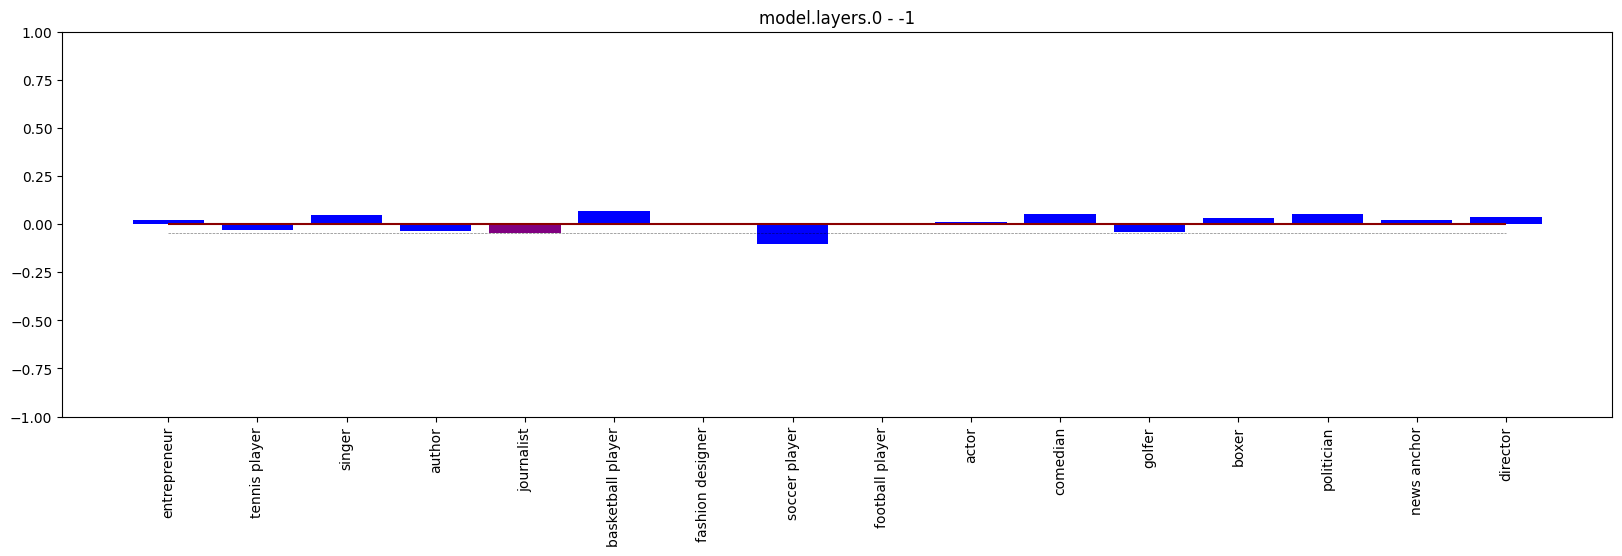

model.layers.0 - -1 => [('basketball player', 0.06884765625), ('comedian', 0.0546875), ('politician', 0.051025390625), ('singer', 0.0458984375), ('director', 0.035888671875), ('boxer', 0.033203125), ('news anchor', 0.021240234375), ('entrepreneur', 0.0205078125), ('actor', 0.008544921875), ('football player', 0.00640869140625), ('fashion designer', -0.006195068359375), ('tennis player', -0.0294189453125), ('author', -0.034423828125), ('golfer', -0.04150390625), ('journalist', -0.04736328125), ('soccer player', -0.10400390625)]
[('entrepreneur', -0.052734375), ('tennis player', 0.25), ('singer', -0.061279296875), ('author', 0.1484375), ('journalist', 0.0419921875), ('basketball player', -0.11181640625), ('fashion designer', 0.04296875), ('soccer player', -0.045166015625), ('football player', -0.11376953125), ('actor', 0.18359375), ('comedian', -0.15625), ('golfer', 0.1298828125), ('boxer', 0.10107421875), ('politician', -0.0150146484375), ('news anchor', 0.053955078125), ('director', 0.

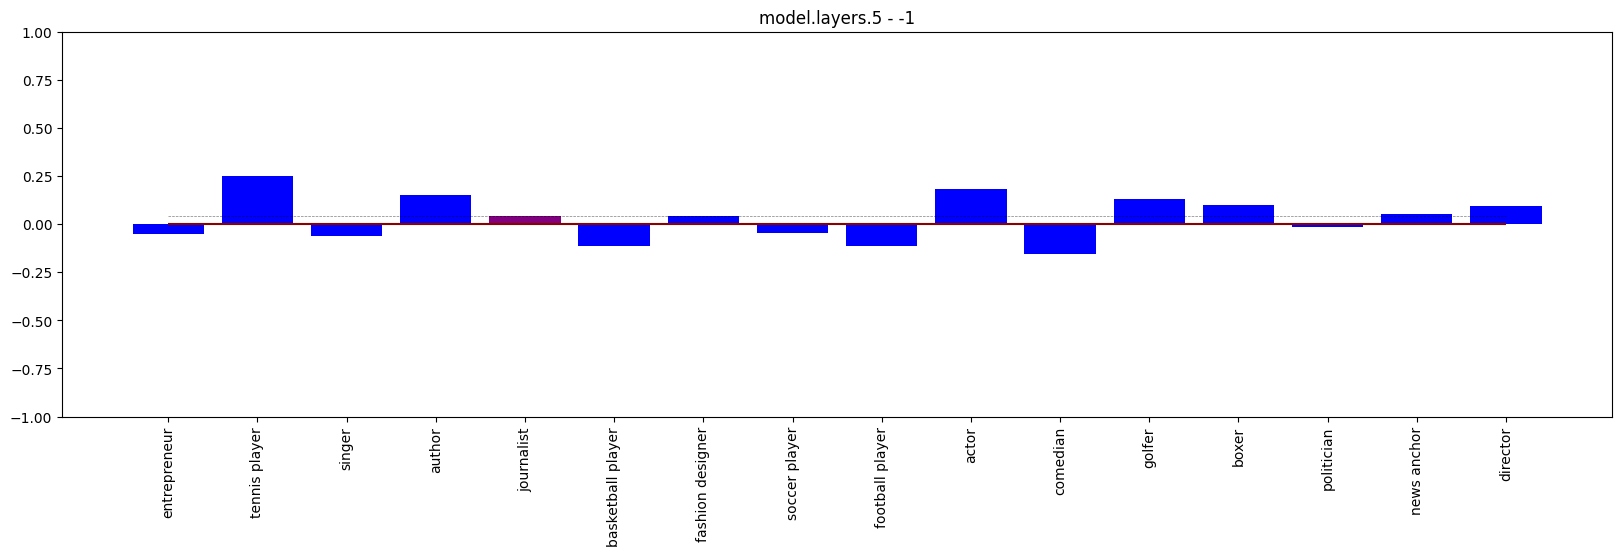

model.layers.5 - -1 => [('tennis player', 0.25), ('actor', 0.18359375), ('author', 0.1484375), ('golfer', 0.1298828125), ('boxer', 0.10107421875), ('director', 0.09423828125), ('news anchor', 0.053955078125), ('fashion designer', 0.04296875), ('journalist', 0.0419921875), ('politician', -0.0150146484375), ('soccer player', -0.045166015625), ('entrepreneur', -0.052734375), ('singer', -0.061279296875), ('basketball player', -0.11181640625), ('football player', -0.11376953125), ('comedian', -0.15625)]
[('entrepreneur', 0.056396484375), ('tennis player', 0.05029296875), ('singer', -0.125), ('author', 0.052490234375), ('journalist', 0.28125), ('basketball player', -0.04736328125), ('fashion designer', 0.0194091796875), ('soccer player', -0.2177734375), ('football player', -0.0908203125), ('actor', -0.04638671875), ('comedian', -0.08544921875), ('golfer', 0.052734375), ('boxer', -0.053955078125), ('politician', 0.0810546875), ('news anchor', 0.1982421875), ('director', 0.0003604888916015625)

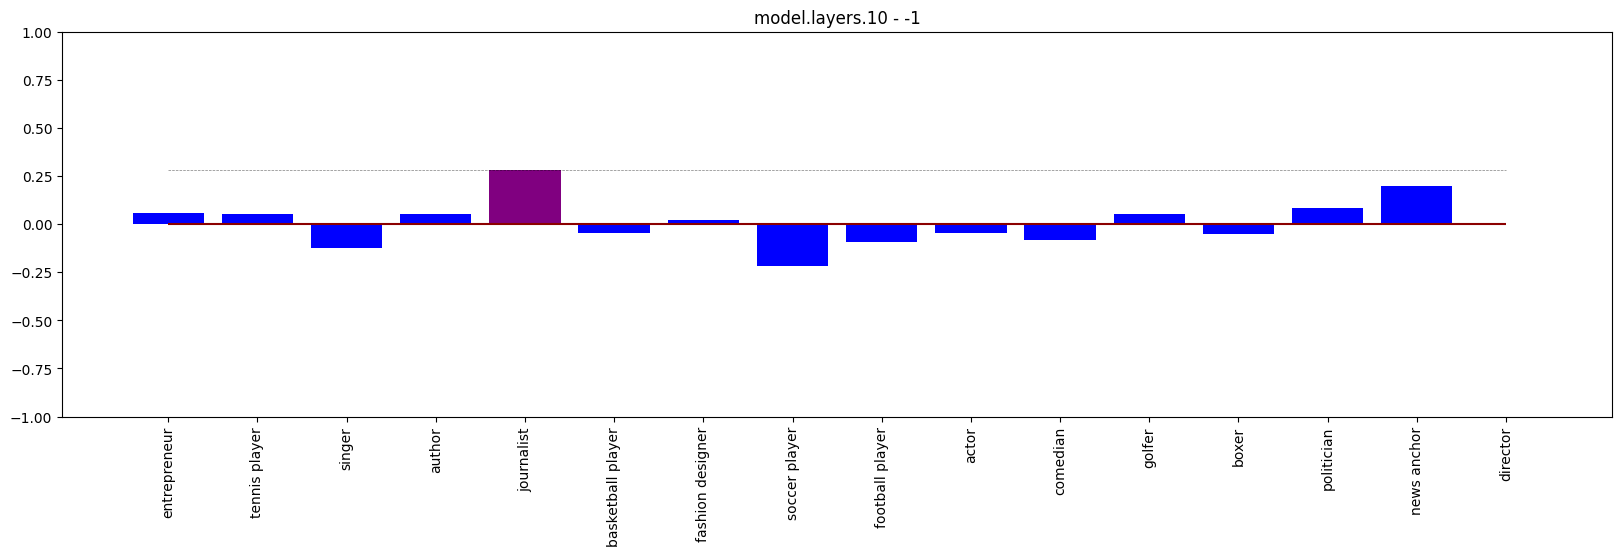

model.layers.10 - -1 => [('journalist', 0.28125), ('news anchor', 0.1982421875), ('politician', 0.0810546875), ('entrepreneur', 0.056396484375), ('golfer', 0.052734375), ('author', 0.052490234375), ('tennis player', 0.05029296875), ('fashion designer', 0.0194091796875), ('director', 0.0003604888916015625), ('actor', -0.04638671875), ('basketball player', -0.04736328125), ('boxer', -0.053955078125), ('comedian', -0.08544921875), ('football player', -0.0908203125), ('singer', -0.125), ('soccer player', -0.2177734375)]
[('entrepreneur', 0.0093994140625), ('tennis player', 0.042724609375), ('singer', -0.1630859375), ('author', -0.08349609375), ('journalist', 0.388671875), ('basketball player', -0.2373046875), ('fashion designer', 0.11865234375), ('soccer player', -0.3203125), ('football player', -0.18359375), ('actor', -0.107421875), ('comedian', 0.07568359375), ('golfer', 0.00830078125), ('boxer', -0.020751953125), ('politician', 0.1376953125), ('news anchor', 0.251953125), ('director', 0

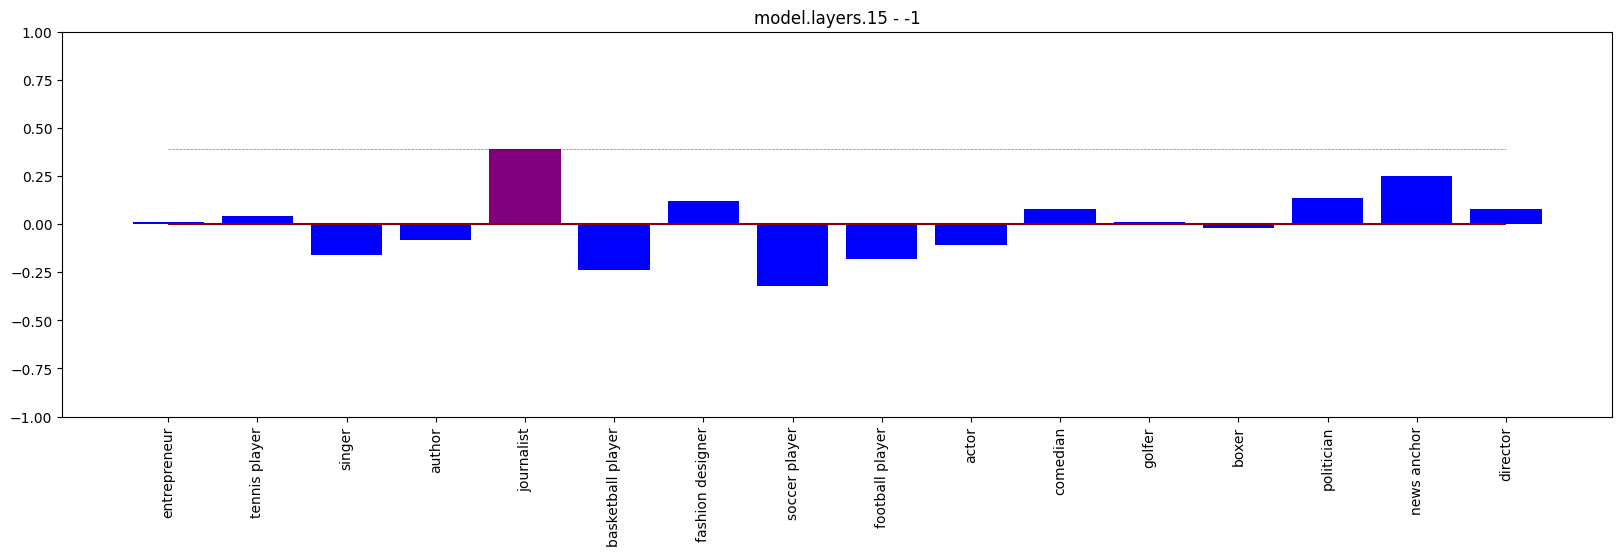

model.layers.15 - -1 => [('journalist', 0.388671875), ('news anchor', 0.251953125), ('politician', 0.1376953125), ('fashion designer', 0.11865234375), ('director', 0.080078125), ('comedian', 0.07568359375), ('tennis player', 0.042724609375), ('entrepreneur', 0.0093994140625), ('golfer', 0.00830078125), ('boxer', -0.020751953125), ('author', -0.08349609375), ('actor', -0.107421875), ('singer', -0.1630859375), ('football player', -0.18359375), ('basketball player', -0.2373046875), ('soccer player', -0.3203125)]
[('entrepreneur', 0.03271484375), ('tennis player', 0.07861328125), ('singer', -0.2578125), ('author', -0.1396484375), ('journalist', 0.458984375), ('basketball player', -0.2578125), ('fashion designer', 0.40234375), ('soccer player', -0.349609375), ('football player', -0.2158203125), ('actor', -0.2578125), ('comedian', 0.30859375), ('golfer', -0.109375), ('boxer', -0.0269775390625), ('politician', -0.0966796875), ('news anchor', 0.375), ('director', 0.091796875)]


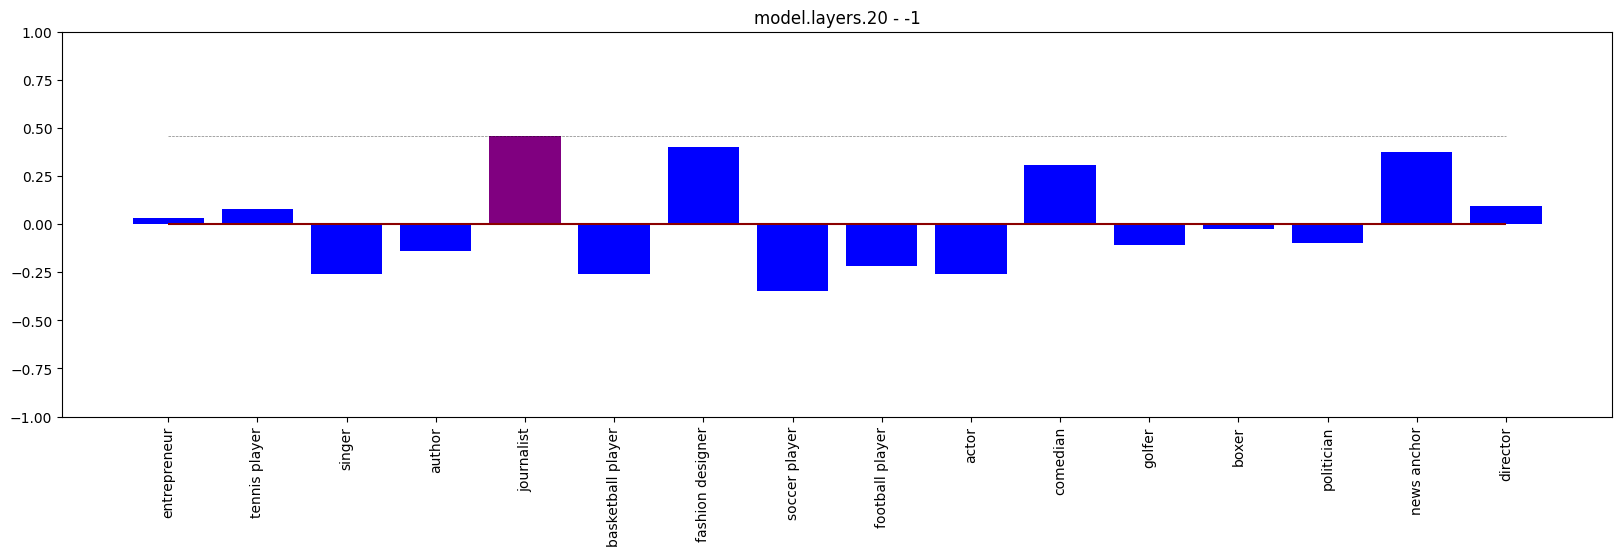

model.layers.20 - -1 => [('journalist', 0.458984375), ('fashion designer', 0.40234375), ('news anchor', 0.375), ('comedian', 0.30859375), ('director', 0.091796875), ('tennis player', 0.07861328125), ('entrepreneur', 0.03271484375), ('boxer', -0.0269775390625), ('politician', -0.0966796875), ('golfer', -0.109375), ('author', -0.1396484375), ('football player', -0.2158203125), ('singer', -0.2578125), ('basketball player', -0.2578125), ('actor', -0.2578125), ('soccer player', -0.349609375)]
[('entrepreneur', 0.041748046875), ('tennis player', 0.044677734375), ('singer', -0.31640625), ('author', -0.0067138671875), ('journalist', 0.5078125), ('basketball player', -0.275390625), ('fashion designer', 0.369140625), ('soccer player', -0.423828125), ('football player', -0.2392578125), ('actor', -0.2119140625), ('comedian', 0.296875), ('golfer', 0.12353515625), ('boxer', -0.1767578125), ('politician', -0.1884765625), ('news anchor', 0.384765625), ('director', 0.0908203125)]


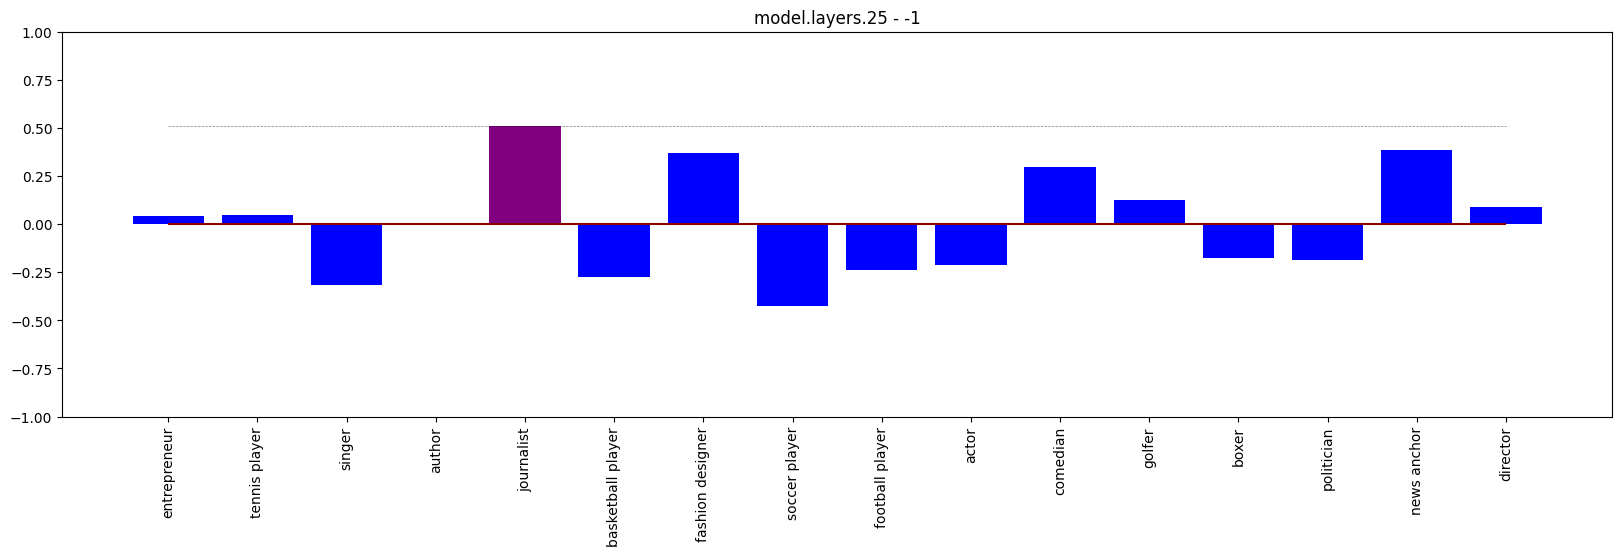

model.layers.25 - -1 => [('journalist', 0.5078125), ('news anchor', 0.384765625), ('fashion designer', 0.369140625), ('comedian', 0.296875), ('golfer', 0.12353515625), ('director', 0.0908203125), ('tennis player', 0.044677734375), ('entrepreneur', 0.041748046875), ('author', -0.0067138671875), ('boxer', -0.1767578125), ('politician', -0.1884765625), ('actor', -0.2119140625), ('football player', -0.2392578125), ('basketball player', -0.275390625), ('singer', -0.31640625), ('soccer player', -0.423828125)]
[('entrepreneur', -0.11083984375), ('tennis player', -0.007415771484375), ('singer', -0.271484375), ('author', 0.31640625), ('journalist', 0.412109375), ('basketball player', -0.2431640625), ('fashion designer', 0.28125), ('soccer player', -0.298828125), ('football player', -0.32421875), ('actor', -0.02978515625), ('comedian', 0.08203125), ('golfer', -0.018798828125), ('boxer', -0.2099609375), ('politician', -0.09423828125), ('news anchor', 0.453125), ('director', 0.035888671875)]


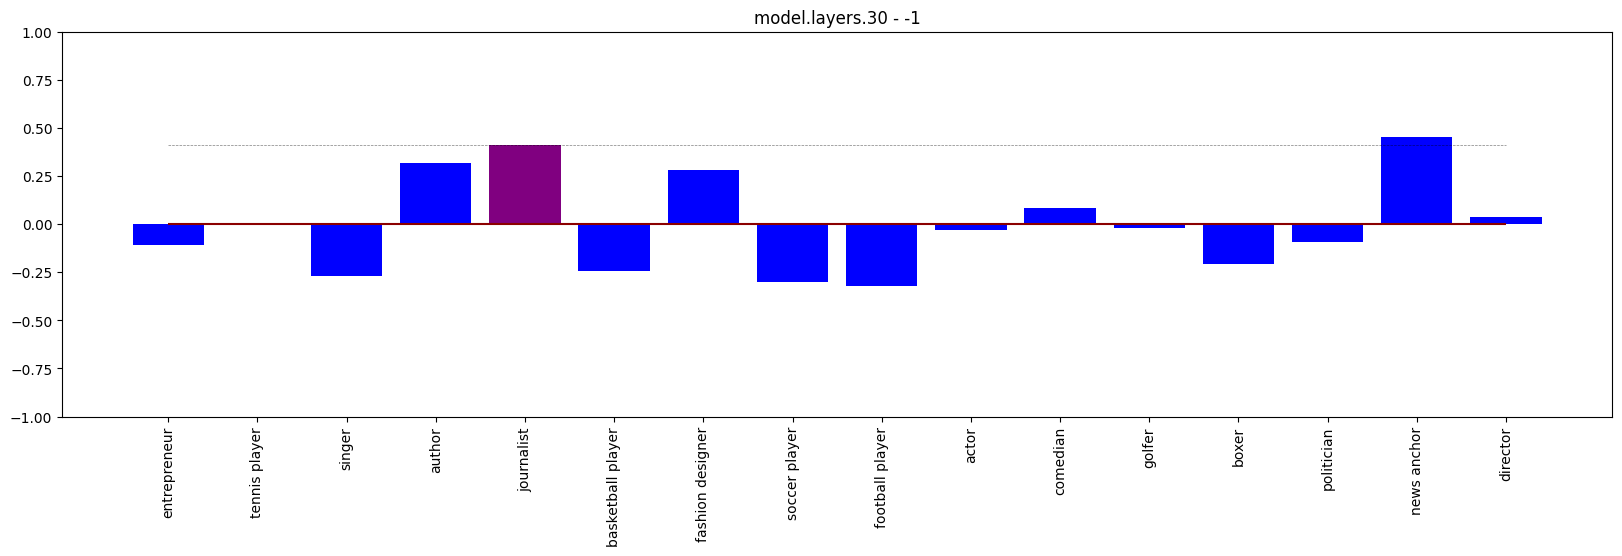

model.layers.30 - -1 => [('news anchor', 0.453125), ('journalist', 0.412109375), ('author', 0.31640625), ('fashion designer', 0.28125), ('comedian', 0.08203125), ('director', 0.035888671875), ('tennis player', -0.007415771484375), ('golfer', -0.018798828125), ('actor', -0.02978515625), ('politician', -0.09423828125), ('entrepreneur', -0.11083984375), ('boxer', -0.2099609375), ('basketball player', -0.2431640625), ('singer', -0.271484375), ('soccer player', -0.298828125), ('football player', -0.32421875)]
[('entrepreneur', -0.1337890625), ('tennis player', 0.034912109375), ('singer', -0.17578125), ('author', 0.396484375), ('journalist', 0.1689453125), ('basketball player', -0.1689453125), ('fashion designer', 0.384765625), ('soccer player', -0.23046875), ('football player', -0.400390625), ('actor', -0.036376953125), ('comedian', -0.06689453125), ('golfer', -0.0023193359375), ('boxer', -0.10498046875), ('politician', -0.0927734375), ('news anchor', 0.2890625), ('director', 0.146484375)]


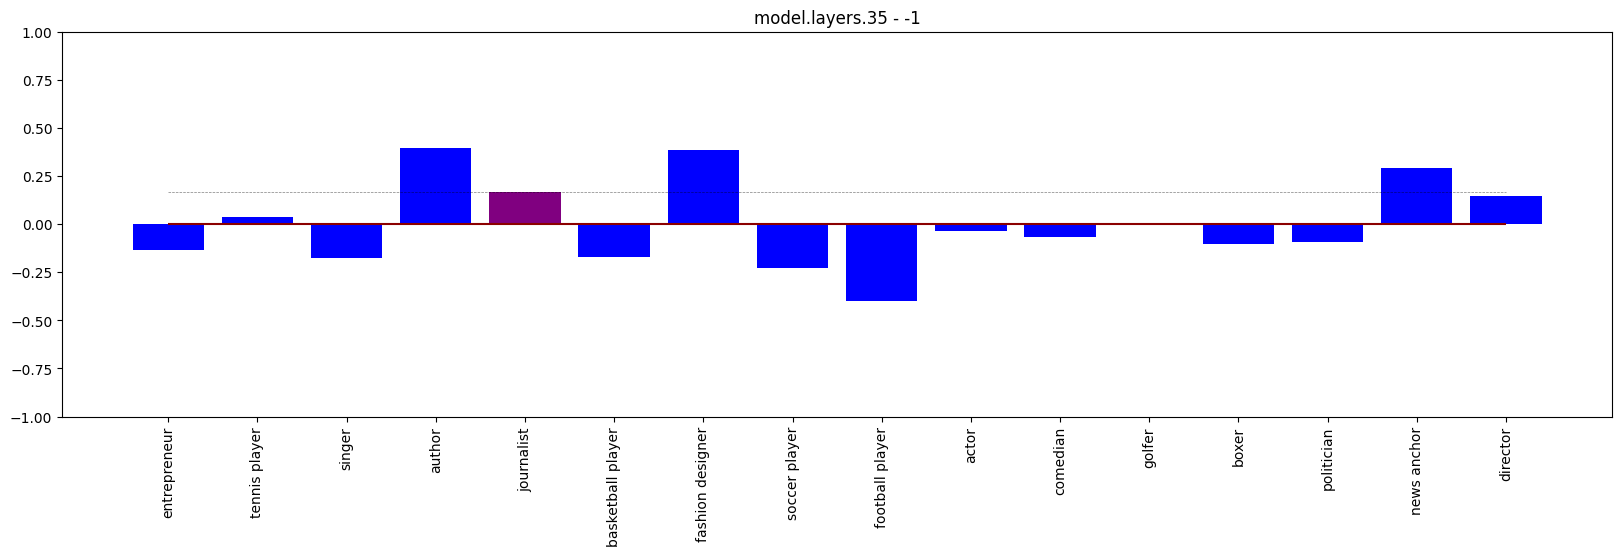

model.layers.35 - -1 => [('author', 0.396484375), ('fashion designer', 0.384765625), ('news anchor', 0.2890625), ('journalist', 0.1689453125), ('director', 0.146484375), ('tennis player', 0.034912109375), ('golfer', -0.0023193359375), ('actor', -0.036376953125), ('comedian', -0.06689453125), ('politician', -0.0927734375), ('boxer', -0.10498046875), ('entrepreneur', -0.1337890625), ('basketball player', -0.1689453125), ('singer', -0.17578125), ('soccer player', -0.23046875), ('football player', -0.400390625)]
[('entrepreneur', -0.1376953125), ('tennis player', -0.0031890869140625), ('singer', -0.12353515625), ('author', 0.38671875), ('journalist', 0.2255859375), ('basketball player', -0.1640625), ('fashion designer', 0.34765625), ('soccer player', -0.21875), ('football player', -0.38671875), ('actor', -0.03955078125), ('comedian', -0.058349609375), ('golfer', -0.06591796875), ('boxer', -0.166015625), ('politician', -0.056884765625), ('news anchor', 0.30859375), ('director', 0.1533203125

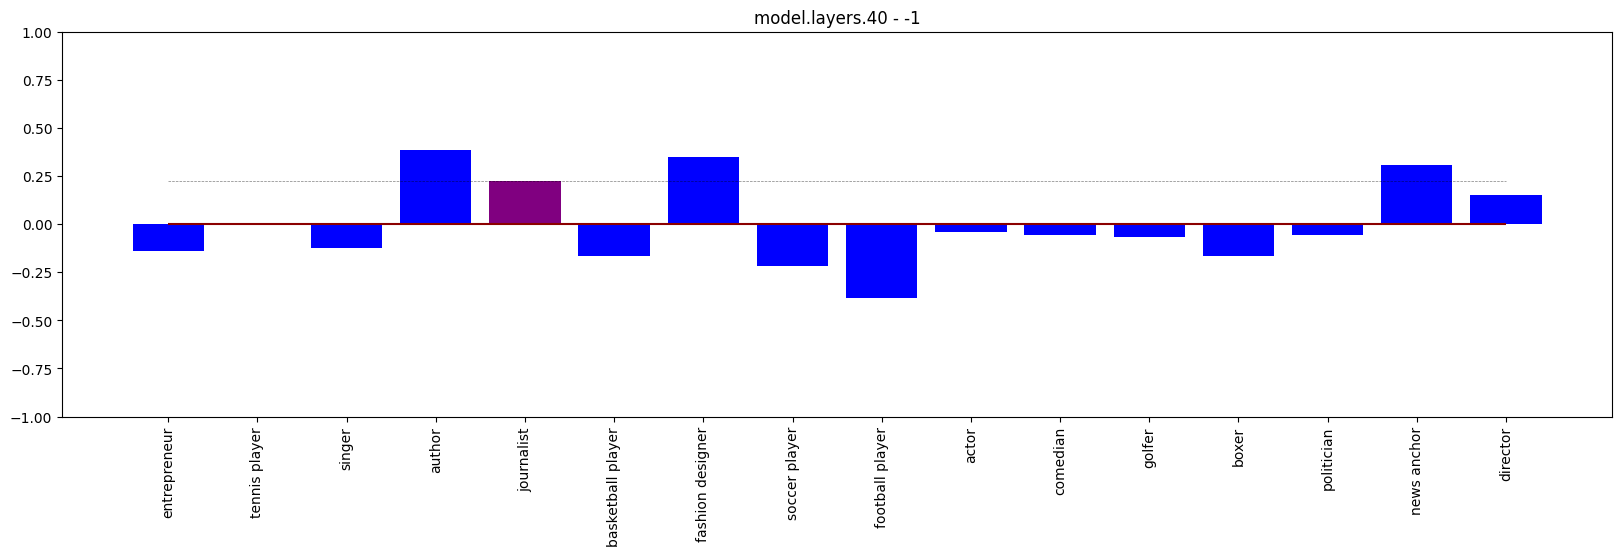

model.layers.40 - -1 => [('author', 0.38671875), ('fashion designer', 0.34765625), ('news anchor', 0.30859375), ('journalist', 0.2255859375), ('director', 0.1533203125), ('tennis player', -0.0031890869140625), ('actor', -0.03955078125), ('politician', -0.056884765625), ('comedian', -0.058349609375), ('golfer', -0.06591796875), ('singer', -0.12353515625), ('entrepreneur', -0.1376953125), ('basketball player', -0.1640625), ('boxer', -0.166015625), ('soccer player', -0.21875), ('football player', -0.38671875)]
[('entrepreneur', -0.1474609375), ('tennis player', -0.055419921875), ('singer', -0.10595703125), ('author', 0.384765625), ('journalist', 0.396484375), ('basketball player', -0.1826171875), ('fashion designer', 0.271484375), ('soccer player', -0.2197265625), ('football player', -0.35546875), ('actor', -0.06396484375), ('comedian', -0.061767578125), ('golfer', -0.09814453125), ('boxer', -0.1845703125), ('politician', -0.021728515625), ('news anchor', 0.318359375), ('director', 0.1191

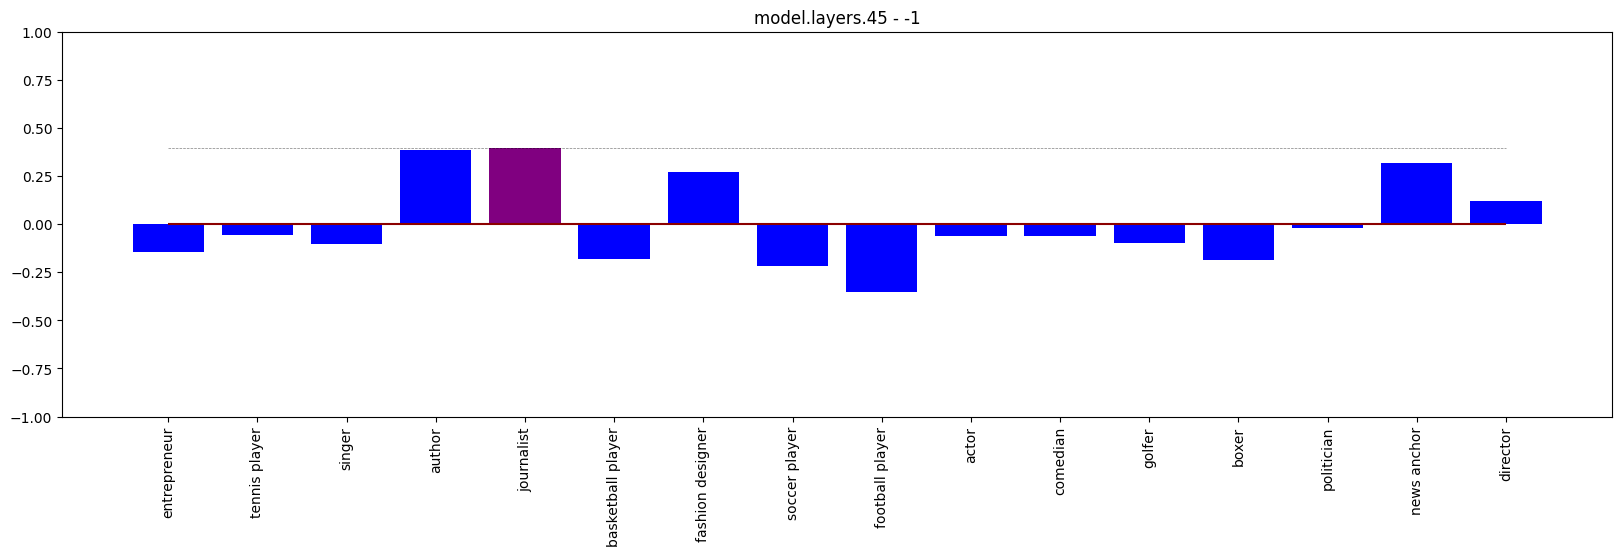

model.layers.45 - -1 => [('journalist', 0.396484375), ('author', 0.384765625), ('news anchor', 0.318359375), ('fashion designer', 0.271484375), ('director', 0.119140625), ('politician', -0.021728515625), ('tennis player', -0.055419921875), ('comedian', -0.061767578125), ('actor', -0.06396484375), ('golfer', -0.09814453125), ('singer', -0.10595703125), ('entrepreneur', -0.1474609375), ('basketball player', -0.1826171875), ('boxer', -0.1845703125), ('soccer player', -0.2197265625), ('football player', -0.35546875)]
[('entrepreneur', -0.1376953125), ('tennis player', -0.080078125), ('singer', -0.146484375), ('author', 0.341796875), ('journalist', 0.5078125), ('basketball player', -0.189453125), ('fashion designer', 0.177734375), ('soccer player', -0.2099609375), ('football player', -0.326171875), ('actor', -0.0986328125), ('comedian', -0.08740234375), ('golfer', -0.0908203125), ('boxer', -0.1865234375), ('politician', -0.0164794921875), ('news anchor', 0.365234375), ('director', 0.09375)]

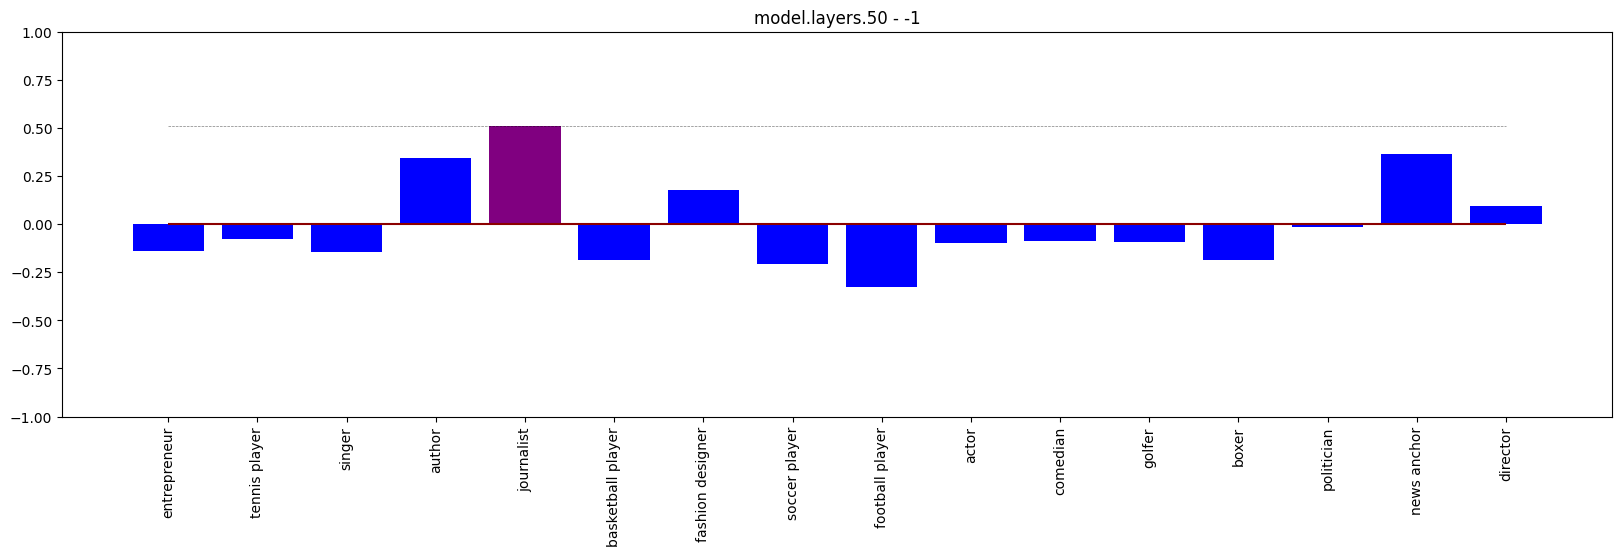

model.layers.50 - -1 => [('journalist', 0.5078125), ('news anchor', 0.365234375), ('author', 0.341796875), ('fashion designer', 0.177734375), ('director', 0.09375), ('politician', -0.0164794921875), ('tennis player', -0.080078125), ('comedian', -0.08740234375), ('golfer', -0.0908203125), ('actor', -0.0986328125), ('entrepreneur', -0.1376953125), ('singer', -0.146484375), ('boxer', -0.1865234375), ('basketball player', -0.189453125), ('soccer player', -0.2099609375), ('football player', -0.326171875)]
[('entrepreneur', -0.1025390625), ('tennis player', -0.08642578125), ('singer', -0.1044921875), ('author', 0.271484375), ('journalist', 0.443359375), ('basketball player', -0.150390625), ('fashion designer', 0.09765625), ('soccer player', -0.1884765625), ('football player', -0.263671875), ('actor', -0.0625), ('comedian', -0.0400390625), ('golfer', -0.10009765625), ('boxer', -0.1845703125), ('politician', -0.002777099609375), ('news anchor', 0.2734375), ('director', 0.11328125)]


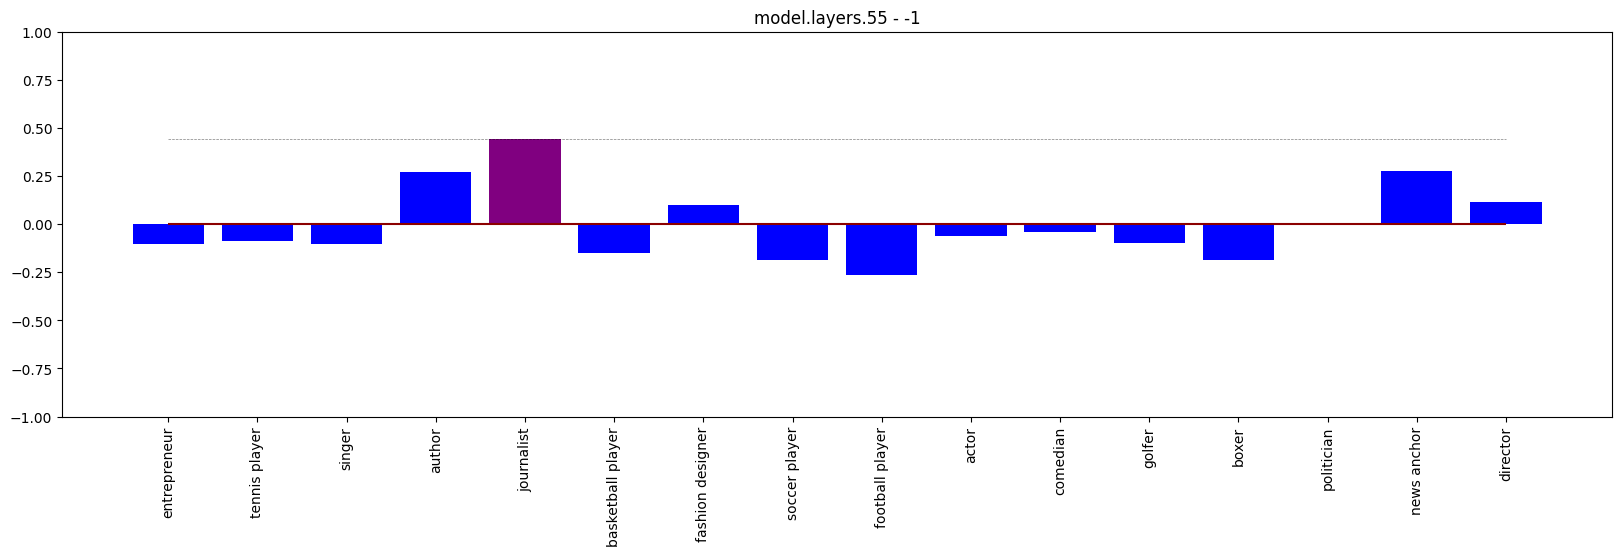

model.layers.55 - -1 => [('journalist', 0.443359375), ('news anchor', 0.2734375), ('author', 0.271484375), ('director', 0.11328125), ('fashion designer', 0.09765625), ('politician', -0.002777099609375), ('comedian', -0.0400390625), ('actor', -0.0625), ('tennis player', -0.08642578125), ('golfer', -0.10009765625), ('entrepreneur', -0.1025390625), ('singer', -0.1044921875), ('basketball player', -0.150390625), ('boxer', -0.1845703125), ('soccer player', -0.1884765625), ('football player', -0.263671875)]
[('entrepreneur', -0.103515625), ('tennis player', -0.0859375), ('singer', -0.09228515625), ('author', 0.2490234375), ('journalist', 0.408203125), ('basketball player', -0.12060546875), ('fashion designer', 0.07470703125), ('soccer player', -0.177734375), ('football player', -0.224609375), ('actor', -0.0517578125), ('comedian', -0.0419921875), ('golfer', -0.08544921875), ('boxer', -0.1728515625), ('politician', -0.00885009765625), ('news anchor', 0.25390625), ('director', 0.134765625)]


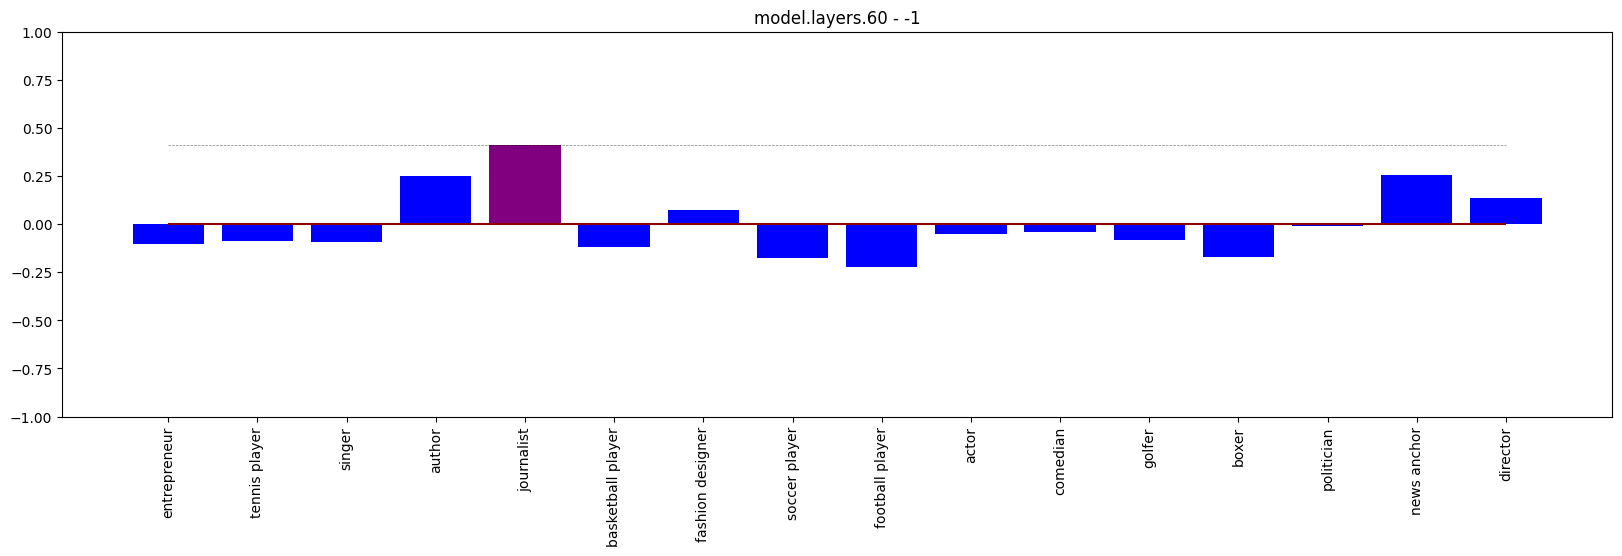

model.layers.60 - -1 => [('journalist', 0.408203125), ('news anchor', 0.25390625), ('author', 0.2490234375), ('director', 0.134765625), ('fashion designer', 0.07470703125), ('politician', -0.00885009765625), ('comedian', -0.0419921875), ('actor', -0.0517578125), ('golfer', -0.08544921875), ('tennis player', -0.0859375), ('singer', -0.09228515625), ('entrepreneur', -0.103515625), ('basketball player', -0.12060546875), ('boxer', -0.1728515625), ('soccer player', -0.177734375), ('football player', -0.224609375)]
[('entrepreneur', -0.1015625), ('tennis player', -0.09716796875), ('singer', -0.0849609375), ('author', 0.2236328125), ('journalist', 0.408203125), ('basketball player', -0.12255859375), ('fashion designer', 0.05322265625), ('soccer player', -0.169921875), ('football player', -0.2138671875), ('actor', -0.0517578125), ('comedian', -0.040283203125), ('golfer', -0.0703125), ('boxer', -0.16015625), ('politician', -0.000270843505859375), ('news anchor', 0.263671875), ('director', 0.113

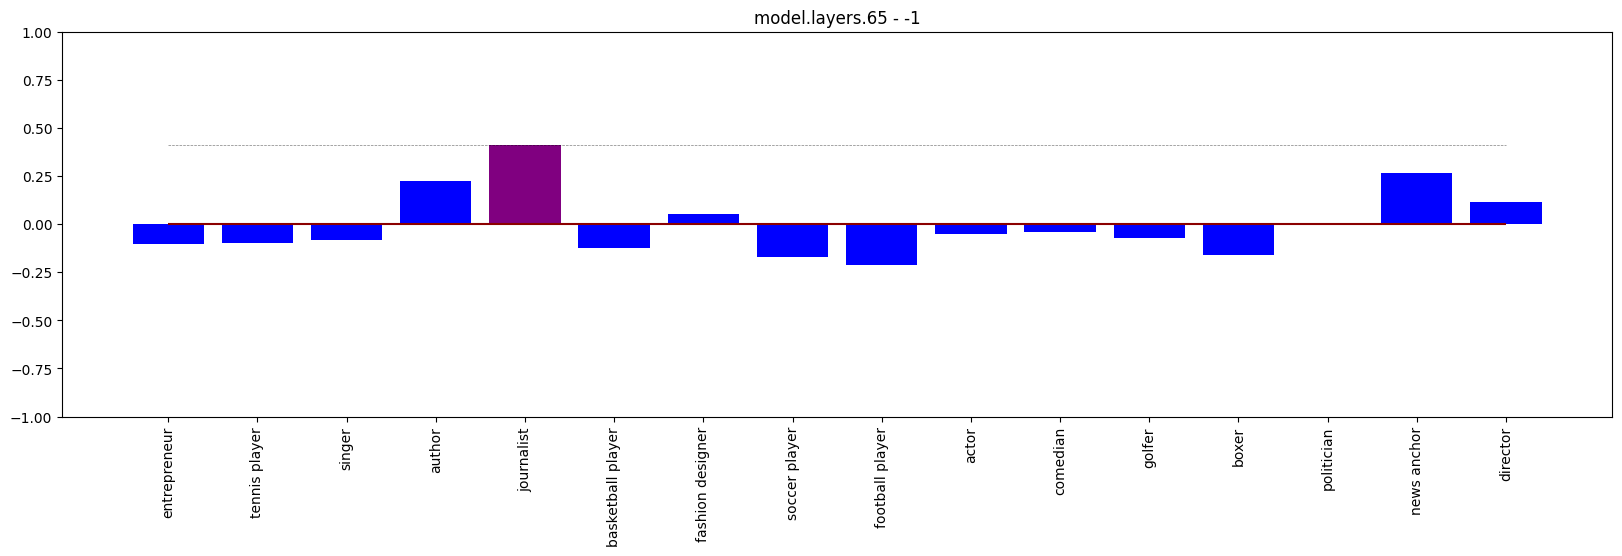

model.layers.65 - -1 => [('journalist', 0.408203125), ('news anchor', 0.263671875), ('author', 0.2236328125), ('director', 0.11328125), ('fashion designer', 0.05322265625), ('politician', -0.000270843505859375), ('comedian', -0.040283203125), ('actor', -0.0517578125), ('golfer', -0.0703125), ('singer', -0.0849609375), ('tennis player', -0.09716796875), ('entrepreneur', -0.1015625), ('basketball player', -0.12255859375), ('boxer', -0.16015625), ('soccer player', -0.169921875), ('football player', -0.2138671875)]
[('entrepreneur', -0.09716796875), ('tennis player', -0.087890625), ('singer', -0.05224609375), ('author', 0.1923828125), ('journalist', 0.353515625), ('basketball player', -0.10888671875), ('fashion designer', 0.04248046875), ('soccer player', -0.142578125), ('football player', -0.1826171875), ('actor', -0.050537109375), ('comedian', -0.03564453125), ('golfer', -0.054931640625), ('boxer', -0.1328125), ('politician', -0.0034637451171875), ('news anchor', 0.2236328125), ('directo

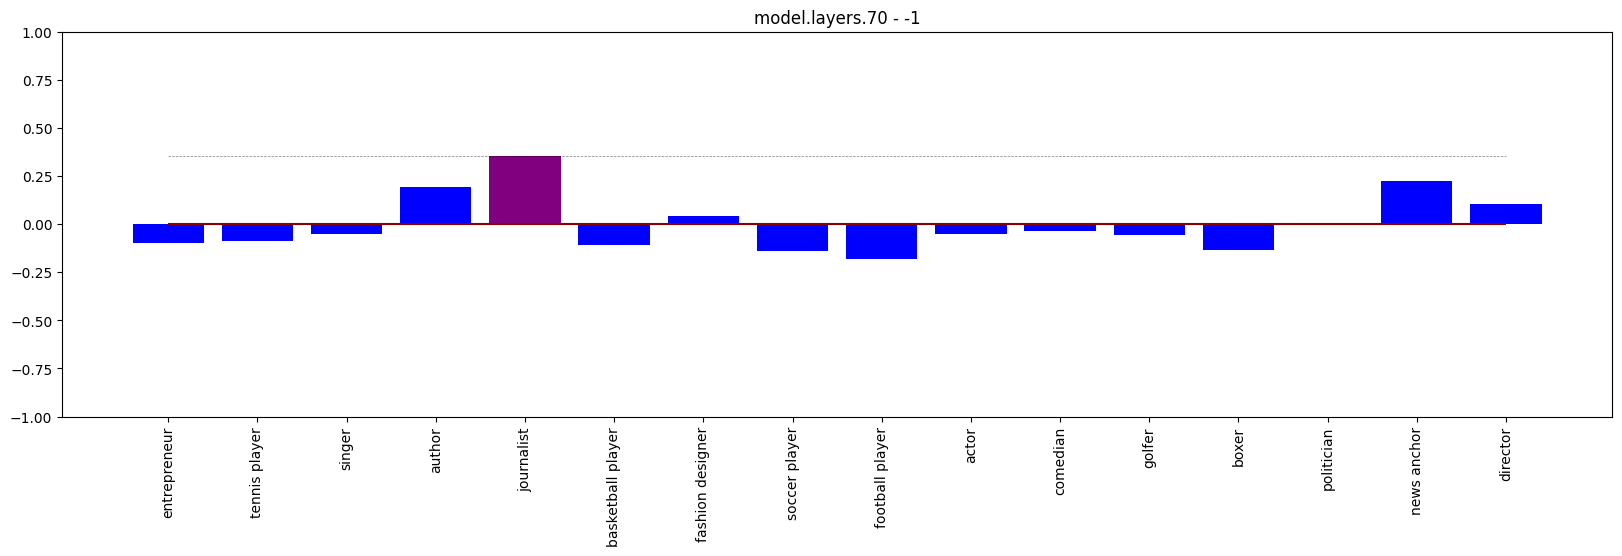

model.layers.70 - -1 => [('journalist', 0.353515625), ('news anchor', 0.2236328125), ('author', 0.1923828125), ('director', 0.10400390625), ('fashion designer', 0.04248046875), ('politician', -0.0034637451171875), ('comedian', -0.03564453125), ('actor', -0.050537109375), ('singer', -0.05224609375), ('golfer', -0.054931640625), ('tennis player', -0.087890625), ('entrepreneur', -0.09716796875), ('basketball player', -0.10888671875), ('boxer', -0.1328125), ('soccer player', -0.142578125), ('football player', -0.1826171875)]
[('entrepreneur', -0.07958984375), ('tennis player', -0.078125), ('singer', -0.040283203125), ('author', 0.1748046875), ('journalist', 0.32421875), ('basketball player', -0.10888671875), ('fashion designer', 0.0272216796875), ('soccer player', -0.1376953125), ('football player', -0.1630859375), ('actor', -0.03369140625), ('comedian', -0.03515625), ('golfer', -0.06494140625), ('boxer', -0.119140625), ('politician', 0.01385498046875), ('news anchor', 0.19140625), ('direc

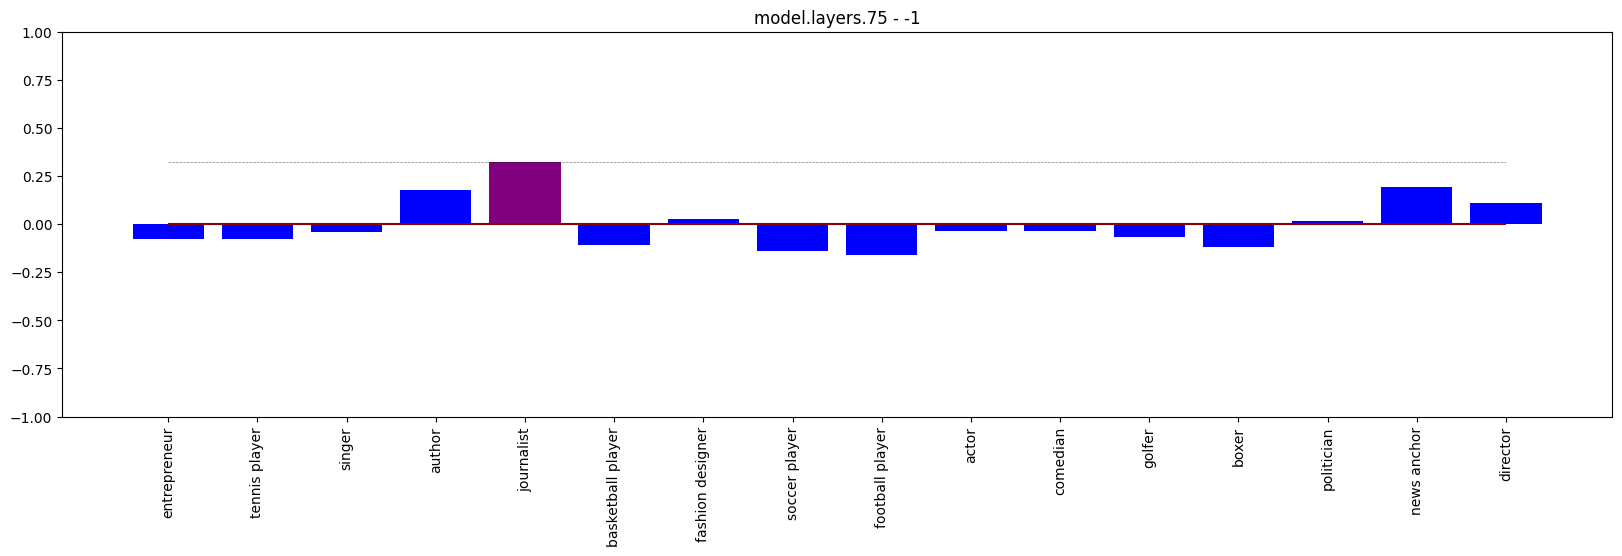

model.layers.75 - -1 => [('journalist', 0.32421875), ('news anchor', 0.19140625), ('author', 0.1748046875), ('director', 0.111328125), ('fashion designer', 0.0272216796875), ('politician', 0.01385498046875), ('actor', -0.03369140625), ('comedian', -0.03515625), ('singer', -0.040283203125), ('golfer', -0.06494140625), ('tennis player', -0.078125), ('entrepreneur', -0.07958984375), ('basketball player', -0.10888671875), ('boxer', -0.119140625), ('soccer player', -0.1376953125), ('football player', -0.1630859375)]


In [ ]:
from src.functional import get_hs

sample = patch_sample
locations = [(mt.layer_name_format.format(layer_idx), -1) for layer_idx in range(0, mt.n_layer, 5)]
# locations = [(mt.layer_name_format.format(35), -1)]

hs = get_hs(
    mt=mt,
    input=patch_sample.prompt,
    locations=locations,
    return_dict=True
)

apply_and_visualize_probes(
    hs=hs,
    probe_directions=probe_directions,
    locations=locations,
    highlight_concepts=[patch_sample.metadata["category"]],
    ylim=(-1, 1),
)